In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
for fontInfo in fm.fontManager.ttflist :
  if 'Nanum' in fontInfo.name :
    print(fontInfo.name+ " = " + fontInfo.fname)

Nanum Pen Script = /usr/share/fonts/truetype/nanum/NanumPen.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareB.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicLight.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumBarunpen = /usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
NanumMyeongjo Ec

In [ ]:
import matplotlib.font_manager as fm
fm._rebuild()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
seoul = pd.read_excel('/content/drive/MyDrive/project/주요관광지점 입장객_서울.xls')

In [ ]:
seoul

,시도,군구,관광지,내/외국인,총계(2011.01 ~ 2019.12),2011년,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,2012년,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,2013년,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 82,2017년,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,2018년,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,2019년,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121
0,NaN,NaN,NaN,NaN,NaN,인원계,2011년 01월,2011년 02월,2011년 03월,2011년 04월,2011년 05월,2011년 06월,2011년 07월,2011년 08월,2011년 09월,2011년 10월,2011년 11월,2011년 12월,인원계,2012년 01월,2012년 02월,2012년 03월,2012년 04월,2012년 05월,2012년 06월,2012년 07월,2012년 08월,2012년 09월,2012년 10월,2012년 11월,2012년 12월,인원계,2013년 01월,2013년 02월,2013년 03월,2013년 04월,2013년 05월,2013년 06월,2013년 07월,2013년 08월,...,2016년 12월,인원계,2017년 01월,2017년 02월,2017년 03월,2017년 04월,2017년 05월,2017년 06월,2017년 07월,2017년 08월,2017년 09월,2017년 10월,2017년 11월,2017년 12월,인원계,2018년 01월,2018년 02월,2018년 03월,2018년 04월,2018년 05월,2018년 06월,2018년 07월,2018년 08월,2018년 09월,2018년 10월,2018년 11월,2018년 12월,인원계,2019년 01월,2019년 02월,2019년 03월,2019년 04월,2019년 05월,2019년 06월,2019년 07월,2019년 08월,2019년 09월,2019년 10월,2019년 11월,2019년 12월
1,서울특별시,종로구,경복궁,내국인,30615230.0,3799804,141183,230814,228276,349368,438567,252185,275074,386264,437683,518742,304318,237330,3098348,114505,169684,233028,336255,481103,224854,193169,202572,296957,520733,192476,133012,2953338,105724,140253,179912,276043,522279,208081,203073,255664,...,151317,3336671,165237,155014,165143,351637,355030,175296,184033,236717,308138,850481,225334,164611,3425247,124211,197756,220494,341280,407217,279530,200582,198930,528333,434708,290439,201767,3874837,169113,263784,233317,387075,449268,321317,264643,260658,494024,464290,327614,239734
2,서울특별시,종로구,경복궁,외국인,14348476.0,1284747,40224,44906,73166,89972,80539,70120,141034,169329,152005,164752,126301,132399,1423823,109310,79221,100000,134279,117936,112631,138101,168712,106412,138532,113319,105370,1446982,82184,92997,119793,130082,82579,115003,162364,205693,...,142110,1168321,151625,139457,100061,124811,83321,81119,69373,61121,68142,151735,65577,71979,1022324,40684,80773,77248,97644,69268,89976,80522,74322,114309,107233,95800,94545,1471909,54374,109846,129009,163903,124746,118578,96569,184321,175337,118553,96761,99912
3,서울특별시,종로구,경복궁,합계,44963706.0,5084551,181407,275720,301442,439340,519106,322305,416108,555593,589688,683494,430619,369729,4522171,223815,248905,333028,470534,599039,337485,331270,371284,403369,659265,305795,238382,4400320,187908,233250,299705,406125,604858,323084,365437,461357,...,293427,4504992,316862,294471,265204,476448,438351,256415,253406,297838,376280,1002216,290911,236590,4447571,164895,278529,297742,438924,476485,369506,281104,273252,642642,541941,386239,296312,5346746,223487,373630,362326,550978,574014,439895,361212,444979,669361,582843,424375,339646
4,서울특별시,종로구,경희궁,내국인,216782.0,101836,4386,4943,6747,9883,11304,8349,5089,9664,13280,12506,8319,7366,114946,5995,4991,7862,11826,11870,6881,8954,8954,8260,23918,10220,5215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [ ]:
# 데이터 전처리 하기
seoul = seoul.T
seoul = seoul.reset_index(drop = True)

for i in seoul.iloc[:,2:].columns:
  if seoul.loc[3,i] != '내국인':
    seoul = seoul.drop(i, axis = 1)

seoul.columns = seoul.loc[2,:]
seoul = seoul.drop([0,1,2,3,4,5], axis = 0)
seoul


2,NaN,경복궁,경희궁,서울역사박물관,운현궁,종묘,창경궁,창덕궁,청와대사랑채,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움
6,2011년 01월,141183,4386,57787,6523,11486,17644,43677,12330,72313,92135,234587,260272,3204,NaN,1747,34551,18407,10128,736,13486,494730,NaN,NaN
7,2011년 02월,230814,4943,64148,10682,17078,35708,73330,13685,135771,132920,171376,224691,2182,NaN,1943,20934,14387,15695,1730,18578,506321,NaN,NaN
8,2011년 03월,228276,6747,72844,10024,22238,29856,78705,12627,105735,64869,260687,184565,3303,NaN,3000,18641,47554,11468,2085,22696,288170,NaN,NaN
9,2011년 04월,349368,9883,128120,17574,30470,70101,129150,21065,176991,85548,56024,240861,3042,NaN,8029,24078,66009,11577,5212,43184,446939,NaN,NaN
10,2011년 05월,438567,11304,155529,27575,56106,78017,151833,19722,188983,103100,279310,307969,2644,NaN,17108,25593,72267,9507,6201,44836,474422,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2019년 08월,260658,NaN,NaN,NaN,29250,55413,70899,NaN,73788,149905,273904,478483,4412,403,7079,37779,106315,7269,3928,29629,526720,162727,151226
118,2019년 09월,494024,NaN,NaN,NaN,12956,88586,159379,NaN,142530,181790,130096,244301,3587,883,8488,15771,97723,2437,4356,32549,398863,100336,82402
119,2019년 10월,464290,NaN,NaN,NaN,30737,92701,195038,NaN,163316,280107,123357,289342,12106,1191,26628,21167,127285,4148,8726,56195,592733,124684,82513
120,2019년 11월,327614,NaN,NaN,NaN,44043,85831,162858,NaN,125777,222529,57786,197011,5877,293,8802,19904,62358,2920,5719,30117,460324,98659,79118


In [ ]:
seoul = seoul.rename(columns = {np.nan:'date'})
seoul = seoul.reset_index(drop = True)
seoul

2,date,경복궁,경희궁,서울역사박물관,운현궁,종묘,창경궁,창덕궁,청와대사랑채,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움
0,2011년 01월,141183,4386,57787,6523,11486,17644,43677,12330,72313,92135,234587,260272,3204,NaN,1747,34551,18407,10128,736,13486,494730,NaN,NaN
1,2011년 02월,230814,4943,64148,10682,17078,35708,73330,13685,135771,132920,171376,224691,2182,NaN,1943,20934,14387,15695,1730,18578,506321,NaN,NaN
2,2011년 03월,228276,6747,72844,10024,22238,29856,78705,12627,105735,64869,260687,184565,3303,NaN,3000,18641,47554,11468,2085,22696,288170,NaN,NaN
3,2011년 04월,349368,9883,128120,17574,30470,70101,129150,21065,176991,85548,56024,240861,3042,NaN,8029,24078,66009,11577,5212,43184,446939,NaN,NaN
4,2011년 05월,438567,11304,155529,27575,56106,78017,151833,19722,188983,103100,279310,307969,2644,NaN,17108,25593,72267,9507,6201,44836,474422,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,2019년 08월,260658,NaN,NaN,NaN,29250,55413,70899,NaN,73788,149905,273904,478483,4412,403,7079,37779,106315,7269,3928,29629,526720,162727,151226
112,2019년 09월,494024,NaN,NaN,NaN,12956,88586,159379,NaN,142530,181790,130096,244301,3587,883,8488,15771,97723,2437,4356,32549,398863,100336,82402
113,2019년 10월,464290,NaN,NaN,NaN,30737,92701,195038,NaN,163316,280107,123357,289342,12106,1191,26628,21167,127285,4148,8726,56195,592733,124684,82513
114,2019년 11월,327614,NaN,NaN,NaN,44043,85831,162858,NaN,125777,222529,57786,197011,5877,293,8802,19904,62358,2920,5719,30117,460324,98659,79118


In [ ]:
서울1112 = pd.read_csv('/content/drive/MyDrive/project/수도권기상청1112.csv')
서울1314 = pd.read_csv('/content/drive/MyDrive/project/수도권기상청1314.csv')
서울1516 = pd.read_csv('/content/drive/MyDrive/project/수도권기상청1516.csv')
서울1718 = pd.read_csv('/content/drive/MyDrive/project/수도권기상청1718.csv')
서울19 = pd.read_csv('/content/drive/MyDrive/project/수도권기상청1920.csv')

In [ ]:
서울19

,지점 번호,지점명,일시,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),강수 계속시간(hr),10분 최다강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),일기현상,안개 계속 시간(hr)
0,98,동두천,2019-01-01,-7.0,-13.0,724,0.2,1317,NaN,NaN,NaN,NaN,NaN,NaN,7.4,320.0,1941.0,5.2,290,1947,1.7,1479.0,290.0,-16.5,29,1347,48.1,1.7,1019.1,1036.8,229.0,1031.6,1340.0,1034.3,9.6,7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,1.9,-5.7,-16.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98,동두천,2019-01-02,-6.7,-13.0,756,1.6,1445,NaN,NaN,NaN,NaN,NaN,NaN,5.0,290.0,1547.0,3.7,290,1556,1.0,844.0,360.0,-17.4,17,1431,46.1,1.6,1020.1,1037.5,928.0,1033.2,1422.0,1035.2,9.6,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.0,-6.0,-18.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,98,동두천,2019-01-03,-5.3,-12.7,631,3.2,1349,NaN,NaN,NaN,NaN,NaN,NaN,3.0,200.0,1201.0,1.9,180,1207,0.8,731.0,20.0,-17.7,14,1549,41.8,1.6,1021.0,1037.9,916.0,1034.1,1605.0,1036.1,9.6,8.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.0,-5.5,-17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,98,동두천,2019-01-04,-2.7,-10.8,718,4.9,1321,NaN,NaN,NaN,NaN,NaN,NaN,6.3,250.0,1419.0,4.6,270,1421,1.1,979.0,140.0,-10.6,25,1257,56.5,2.9,1016.1,1036.3,3.0,1027.2,2351.0,1031.0,9.6,6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,0.9,-3.7,-15.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,98,동두천,2019-01-05,-3.4,-7.9,817,2.8,1451,NaN,NaN,NaN,NaN,NaN,NaN,5.8,320.0,1251.0,3.5,320,1202,1.3,1136.0,20.0,-17.0,16,1425,37.3,1.7,1013.2,1029.9,1038.0,1026.2,1644.0,1028.1,9.6,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1,0.6,-4.0,-15.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5843,203,이천,2020-12-27,1.9,-3.4,728,7.7,1504,NaN,NaN,NaN,NaN,NaN,NaN,2.5,90.0,1057.0,1.3,110,1104,0.4,367.0,50.0,-1.1,59,1450,81.6,5.6,1012.9,1025.7,246.0,1020.3,1425.0,1023.0,9.6,4.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.4,2.6,0.1,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5844,203,이천,2020-12-28,4.0,-0.1,2259,11.1,1504,NaN,NaN,NaN,NaN,NaN,NaN,2.4,110.0,1523.0,1.4,70,2010,0.5,408.0,70.0,-0.5,36,1540,74.5,5.9,1014.1,1025.9,1025.0,1022.7,1.0,1024.1,9.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.4,3.3,0.7,-4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5845,203,이천,2020-12-29,-0.1,-3.7,2356,5.9,1210,NaN,NaN,NaN,NaN,NaN,0.6,8.0,270.0,2148.0,4.1,290,2229,1.3,1105.0,270.0,-3.5,36,2226,80.0,4.9,1011.5,1024.9,336.0,1019.6,2134.0,1021.7,9.6,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.1,7.3,0.0,-6.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5846,203,이천,2020-12-30,-9.3,-12.8,2356,-3.8,1,NaN,NaN,NaN,NaN,NaN,NaN,7.9,320.0,1555.0,4.0,290,1146,2.5,2192.0,320.0,-18.4,30,1428,48.3,1.5,1013.1,1027.7,2355.0,1020.0,1.0,1023.6,9.6,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.8,0.4,-3.0,-14.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
서울19['일시'] = 서울19['일시'].apply(lambda x : int(x[:7].replace('-','')))
서울19['일시']

0       201901
1       201901
2       201901
3       201901
4       201901
         ...  
5843    202012
5844    202012
5845    202012
5846    202012
5847    202012
Name: 일시, Length: 5848, dtype: int64

In [ ]:
서울19 = 서울19[서울19['일시'] <= 201912]
서울19['일시'] = 서울19['일시'].astype('str')
서울19 = 서울19.loc[서울19['지점명'] == '서울']
서울19 = 서울19.groupby('일시')['평균 기온(°C)', '최저 기온(°C)', '최저 기온 시각(hhmi)', '최고 기온(°C)',
       '최고 기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)',
       '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '평균 전운량(10분위)', '평균 중하층운량(10분위)',
       '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '안개 계속 시간(hr)'].mean()
서울19

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),강수 계속시간(hr),10분 최다강수량(mm),10분 최다강수량 시각(hhmi),1시간 최다강수량(mm),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),일 최심신적설(cm),일 최심신적설 시각(hhmi),일 최심적설(cm),일 최심적설 시각(hhmi),합계 3시간 신적설(cm),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 대형증발량(mm),합계 소형증발량(mm),9-9강수(mm),안개 계속 시간(hr)
일시,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
201901,-0.896774,-5.064516,1044.645161,4.087097,1374.870968,NaN,NaN,NaN,NaN,2.366000,0.000000,7.629032,276.129032,1296.903226,4.190323,288.387097,1381.709677,1.819355,1572.387097,243.548387,-12.048387,25.709677,1393.419355,45.583871,2.700000,1015.445161,1029.074194,1175.645161,1023.935484,1480.129032,1026.383871,9.906452,6.935484,1209.677419,1.640323,9.201613,NaN,NaN,NaN,NaN,NaN,3.122581,1.935484,-0.458065,-11.125806,-0.725806,-0.403226,0.119355,0.709677,1.845161,4.777419,7.580645,13.525806,16.470968,1.429032,2.041935,0.000000,NaN
201902,0.985714,-3.217857,746.035714,6.046429,1470.000000,NaN,NaN,NaN,NaN,6.768889,2.644444,7.750000,250.000000,1387.250000,4.107143,265.000000,1349.535714,1.842857,1600.964286,232.500000,-10.103571,26.000000,1296.928571,47.310714,3.207143,1013.671429,1027.239286,882.178571,1021.567857,1292.035714,1024.503571,10.803571,6.803571,1228.571429,1.922500,11.427143,1.24,1080.0,1.028571,720.333333,1.34,4.771429,2.682143,1.642857,-7.835714,1.214286,1.282143,1.528571,1.703571,1.896429,3.853571,6.096429,11.507143,15.128571,1.775000,2.539286,2.380000,1.08
201903,7.093548,2.745161,845.838710,12.445161,1457.774194,NaN,NaN,NaN,NaN,4.459000,2.680000,8.845161,260.967742,1539.225806,4.722581,270.645161,1564.193548,2.087097,1794.806452,240.967742,-3.422581,25.838710,1416.483871,51.303226,5.109677,1006.648387,1020.464516,980.774194,1013.958065,1071.225806,1017.138710,11.954839,6.574194,1219.354839,2.141290,13.474839,NaN,NaN,NaN,NaN,NaN,4.690323,3.180645,8.151613,-2.593548,7.132258,7.193548,7.041935,6.800000,6.877419,6.825806,7.496774,10.538710,13.925806,2.467742,3.522581,2.977778,1.40
201904,12.120000,7.176667,876.366667,17.640000,1452.200000,0.076923,644.857143,1.153846,836.000000,6.333846,3.638462,8.896667,216.666667,1446.733333,4.456667,232.000000,1474.133333,1.876667,1617.933333,227.666667,0.680000,27.366667,1434.066667,50.943333,7.170000,1004.823333,1017.893333,996.066667,1012.510000,1313.166667,1015.083333,13.160000,7.386667,1193.333333,2.459000,16.737333,NaN,NaN,NaN,NaN,NaN,4.926667,2.936667,14.020000,1.616667,12.620000,12.316667,11.833333,11.360000,11.173333,10.260000,10.076667,10.813333,13.136667,3.446667,4.930000,3.941667,NaN
201905,19.419355,13.729032,785.129032,25.641935,1329.709677,0.428571,850.000000,1.714286,849.000000,5.642857,5.400000,9.035484,246.774194,1505.290323,4.580645,253.870968,1501.354839,2.058065,1777.709677,243.225806,6.390323,24.774194,1308.000000,46.487097,10.154839,1001.574194,1013.574194,1051.709677,1009.177419,1402.387097,1011.519355,14.187097,10.129032,1196.774194,2.884194,22.625484,NaN,NaN,NaN,NaN,NaN,3.761290,1.200000,24.258065,8.190323,20.851613,20.164516,19.219355,18.345161,17.777419,15.583871,14.209677,12.090323,12.890323,5.203226,7.422581,5.400000,NaN
201906,22.503333,18.060000,684.033333,27.706667,1506.966667,0.714286,937.375000,2.335714,883.875000,4.761429,5.285714,7.793333,224.000000,1597.466667,4.003333,246.000000,1609.000000,1.736667,1505.200000,192.666667,13.763333,38.633333,1451.866667,60.606667,16.056667,997.206667,1009.256667,889.400000,1004.610000,1341.966667,1007.000000,14.736667,7.836667,1193.333333,2.668333,19.634000,

In [ ]:
def weather_go(data) :
  data['일시'] = data['일시'].apply(lambda x : x[:7].replace('-',''))
  data = data.loc[data['지점명'] == '서울']

  data = data.groupby('일시')['평균 기온(°C)', '최저 기온(°C)', '최저 기온 시각(hhmi)', '최고 기온(°C)',
       '최고 기온 시각(hhmi)', '강수 계속시간(hr)', '10분 최다강수량(mm)', '10분 최다강수량 시각(hhmi)',
       '1시간 최다강수량(mm)', '1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '일 최심신적설(cm)', '일 최심신적설 시각(hhmi)', '일 최심적설(cm)',
       '일 최심적설 시각(hhmi)', '합계 3시간 신적설(cm)', '평균 전운량(10분위)', '평균 중하층운량(10분위)',
       '평균 지면온도(°C)', '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 대형증발량(mm)', '합계 소형증발량(mm)', '9-9강수(mm)', '안개 계속 시간(hr)'].mean()
  return data

서울1112 = weather_go(서울1112)
서울1314 = weather_go(서울1314)
서울1516 = weather_go(서울1516)
서울1718 = weather_go(서울1718)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


In [ ]:
seoul_list = [서울1112, 서울1314, 서울1516, 서울1718, 서울19]
서울 = pd.DataFrame([])
for i in seoul_list :
  서울 = pd.concat([서울, i], axis = 0)
서울 = 서울.reset_index().rename(columns = {'일시' : 'date'})
서울 = 서울.dropna(axis = 1)
서울

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm)
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,27.190323,23.590323,696.580645,31.635484,1468.516129,4.822667,12.700000,7.525806,216.129032,1440.774194,3.819355,239.354839,1544.548387,1.590323,1369.741935,180.645161,20.354839,44.645161,1358.548387,68.516129,24.235484,996.912903,1008.551613,1049.967742,1004.622581,1165.096774,1006.551613,13.600000,7.976667,1283.333333,2.416000,16.766897,5.632258,3.522581,28.932258,20.964516,27.951613,27.767742,27.219355,27.041935,26.841935,25.222581,23.790323,18.941935,15.316129,5.164516,9.664706
104,201909,22.643333,18.963333,835.433333,27.100000,1359.533333,7.473846,10.753846,7.960000,221.666667,1315.133333,4.253333,245.333333,1422.466667,2.183333,1885.166667,320.333333,15.130000,44.133333,

In [ ]:
seoul['date'] = seoul['date'].apply(lambda x : x.replace('년','').replace('월','')).apply(lambda x : x.replace(' ',''))


In [ ]:
seoul.loc[seoul['date'] == '인원계'].index
seoul = seoul.drop([12,25,38,51,64,77,90,103], axis = 0)
seoul

2,date,경복궁,경희궁,서울역사박물관,운현궁,종묘,창경궁,창덕궁,청와대사랑채,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움
0,201101,141183,4386,57787,6523,11486,17644,43677,12330,72313,92135,234587,260272,3204,NaN,1747,34551,18407,10128,736,13486,494730,NaN,NaN
1,201102,230814,4943,64148,10682,17078,35708,73330,13685,135771,132920,171376,224691,2182,NaN,1943,20934,14387,15695,1730,18578,506321,NaN,NaN
2,201103,228276,6747,72844,10024,22238,29856,78705,12627,105735,64869,260687,184565,3303,NaN,3000,18641,47554,11468,2085,22696,288170,NaN,NaN
3,201104,349368,9883,128120,17574,30470,70101,129150,21065,176991,85548,56024,240861,3042,NaN,8029,24078,66009,11577,5212,43184,446939,NaN,NaN
4,201105,438567,11304,155529,27575,56106,78017,151833,19722,188983,103100,279310,307969,2644,NaN,17108,25593,72267,9507,6201,44836,474422,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,201908,260658,NaN,NaN,NaN,29250,55413,70899,NaN,73788,149905,273904,478483,4412,403,7079,37779,106315,7269,3928,29629,526720,162727,151226
112,201909,494024,NaN,NaN,NaN,12956,88586,159379,NaN,142530,181790,130096,244301,3587,883,8488,15771,97723,2437,4356,32549,398863,100336,82402
113,201910,464290,NaN,NaN,NaN,30737,92701,195038,NaN,163316,280107,123357,289342,12106,1191,26628,21167,127285,4148,8726,56195,592733,124684,82513
114,201911,327614,NaN,NaN,NaN,44043,85831,162858,NaN,125777,222529,57786,197011,5877,293,8802,19904,62358,2920,5719,30117,460324,98659,79118


In [ ]:
seoul.loc[seoul['date']>= '201701'] # 경희궁, 서울역사박물관, 운현궁, 청와대사랑채는 17~19년 모두 nan -> drop
# 서울약령시한의약박물관, 세종대왕기념관, 롯데월드, 서울스카이, 아쿠아리움은 17년에만 nan 

2,date,경복궁,경희궁,서울역사박물관,운현궁,종묘,창경궁,창덕궁,청와대사랑채,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움
78,201701,165237,NaN,NaN,NaN,12773,24650,56789,NaN,44580,69402,77496,456498,NaN,NaN,1659,29396,27598,6671,1227,13241,NaN,NaN,NaN
79,201702,155014,NaN,NaN,NaN,9809,22077,50218,NaN,52138,67840,76071,344705,NaN,NaN,1635,28301,25727,6561,1272,14417,NaN,NaN,NaN
80,201703,165143,NaN,NaN,NaN,15581,37464,72277,NaN,59487,68205,83788,229109,NaN,NaN,3766,23068,62661,3467,2738,30410,NaN,NaN,NaN
81,201704,351637,NaN,NaN,NaN,21154,118778,168988,NaN,97634,120740,60072,235668,NaN,NaN,12765,26021,55776,4081,4515,45239,NaN,NaN,NaN
82,201705,355030,NaN,NaN,NaN,70624,96047,146783,NaN,91142,144608,53506,260195,NaN,NaN,16748,27236,91425,6792,3660,37342,NaN,NaN,NaN
83,201706,175296,NaN,NaN,NaN,55822,53251,80358,NaN,68128,87020,155405,209942,NaN,NaN,9370,26453,60816,4943,3763,32216,NaN,NaN,NaN
84,201707,184033,NaN,NaN,NaN,23562,49725,52737,NaN,50425,65982,191982,287348,NaN,NaN,2914,31237,22459,8261,2543,23263,NaN,NaN,NaN
85,201708,236717,NaN,NaN,NaN,14949,40567,65016,NaN,82899,76731,168860,417934,NaN,NaN,4763,49720,73705,9793,3148,26332,NaN,NaN,NaN
86,201709,308138,NaN,NaN,NaN,19147,43801,99431,NaN,140707,133620,57779,190075,NaN,NaN,10180,0,50794,3899,4342,39542,NaN,NaN,NaN
87,201710,850481,NaN,NaN,NaN,70083,192578,347108,NaN,179913,493927,169585,268676,NaN,NaN,26119,33587,95963,5479,7923,56424,NaN,NaN,NaN


In [ ]:
seoul.columns

Index(['date', '경복궁', '경희궁', '서울역사박물관', '운현궁', '종묘', '창경궁', '창덕궁', '청와대사랑채',
       '남산골한옥마을', '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서울약령시 한의약박물관', '세종대왕기념관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉', '롯데월드', '서울스카이', '아쿠아리움'],
      dtype='object', name=2)

In [ ]:
seoul = seoul.drop(['경희궁', '서울역사박물관', '운현궁', '청와대사랑채'], axis = 1)

In [ ]:
seoul= seoul.reset_index(drop = True)

In [ ]:
seoul

2,date,경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움
0,201101,141183,11486,17644,43677,72313,92135,234587,260272,3204,NaN,1747,34551,18407,10128,736,13486,494730,NaN,NaN
1,201102,230814,17078,35708,73330,135771,132920,171376,224691,2182,NaN,1943,20934,14387,15695,1730,18578,506321,NaN,NaN
2,201103,228276,22238,29856,78705,105735,64869,260687,184565,3303,NaN,3000,18641,47554,11468,2085,22696,288170,NaN,NaN
3,201104,349368,30470,70101,129150,176991,85548,56024,240861,3042,NaN,8029,24078,66009,11577,5212,43184,446939,NaN,NaN
4,201105,438567,56106,78017,151833,188983,103100,279310,307969,2644,NaN,17108,25593,72267,9507,6201,44836,474422,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,260658,29250,55413,70899,73788,149905,273904,478483,4412,403,7079,37779,106315,7269,3928,29629,526720,162727,151226
104,201909,494024,12956,88586,159379,142530,181790,130096,244301,3587,883,8488,15771,97723,2437,4356,32549,398863,100336,82402
105,201910,464290,30737,92701,195038,163316,280107,123357,289342,12106,1191,26628,21167,127285,4148,8726,56195,592733,124684,82513
106,201911,327614,44043,85831,162858,125777,222529,57786,197011,5877,293,8802,19904,62358,2920,5719,30117,460324,98659,79118


In [ ]:
data = pd.merge(서울, seoul, how = 'left', on = 'date')
data

,date,평균 기온(°C),최저 기온(°C),최저 기온 시각(hhmi),최고 기온(°C),최고 기온 시각(hhmi),1시간 최다강수량 시각(hhmi),일강수량(mm),최대 순간풍속(m/s),최대 순간풍속 풍향(16방위),최대 순간풍속 시각(hhmi),최대 풍속(m/s),최대 풍속 풍향(16방위),최대 풍속 시각(hhmi),평균 풍속(m/s),풍정합(100m),최다 풍향(16방위),평균 이슬점온도(°C),최소 상대습도(%),평균 상대습도 시각(hhmi),평균 상대습도(%),평균 중기압(hPa),평균 현지기압(hPa),최고 해면 기압(hPa),최고 해면기압 시각(hhmi),최저 해면기압(hPa),최저 해면기압 시각(hhmi),평균 해면기압(hPa),가조시간(hr),합계 일조 시간(hr),1시간 최다 일사 시각(hhmi),1시간 최다 일사량(MJ/m2),합계 일사량(MJ/m2),평균 전운량(10분위),평균 중하층운량(10분위),평균 지면온도(°C),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 10cm 지중온도(°C),평균 20cm 지중온도(°C),평균 30cm 지중온도(°C),0.5m 지중온도(°C),1.0cm 지중온도(°C),1.5cm 지중온도(°C),3.0cm 지중온도(°C),5.0cm 지중온도(°C),합계 소형증발량(mm),9-9강수(mm),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움
0,201101,-7.183871,-10.522581,966.290323,-3.406452,1392.838710,4.988750,1.112500,8.651613,279.677419,1332.354839,5.593548,276.129032,1362.258065,2.796774,2415.387097,229.354839,-15.341935,35.129032,1230.322581,53.829032,1.983871,1016.145161,1029.725806,1264.483871,1024.980645,1297.838710,1027.322581,9.906452,7.048387,1206.451613,1.791935,9.951290,2.738710,1.761290,-4.693548,-16.083871,-3.261290,-2.667742,-2.248387,-1.077419,1.541935,5.251613,8.338710,14.629032,17.183871,1.209677,0.741667,141183,11486,17644,43677,72313,92135,234587,260272,3204,NaN,1747,34551,18407,10128,736,13486,494730,NaN,NaN
1,201102,1.221429,-2.460714,706.785714,5.864286,1441.535714,12.330000,9.700000,7.907143,230.714286,1485.357143,5.239286,233.571429,1475.035714,2.553571,2210.250000,190.357143,-7.639286,32.000000,1390.214286,55.228571,3.717857,1011.310714,1024.567857,1162.321429,1019.396429,1382.500000,1022.085714,10.803571,5.950000,1214.285714,1.841786,10.827857,4.032143,2.046429,1.696429,-9.564286,0.578571,0.521429,0.310714,0.350000,1.025000,3.521429,6.150000,12.328571,15.900000,1.803571,7.850000,230814,17078,35708,73330,135771,132920,171376,224691,2182,NaN,1943,20934,14387,15695,1730,18578,506321,NaN,NaN
2,201103,3.616129,-0.119355,1033.548387,8.345161,1464.419355,4.872857,2.085714,10.890323,247.096774,1466.548387,6.877419,254.193548,1533.161290,3.406452,2950.032258,246.451613,-6.654839,25.258065,1398.032258,51.112903,4.103226,1010.719355,1023.925806,1272.967742,1018.841935,1298.548387,1021.383871,11.951613,7.748387,1222.580645,2.541290,16.342258,3.303226,1.977419,6.361290,-5.006452,5.216129,5.345161,5.235484,5.422581,5.158065,5.835484,6.867742,11.045161,14.677419,2.958065,1.537500,228276,22238,29856,78705,105735,64869,260687,184565,3303,NaN,3000,18641,47554,11468,2085,22696,288170,NaN,NaN
3,201104,10.720000,6.773333,773.433333,15.596667,1345.500000,7.606364,10.009091,10.196667,235.666667,1339.133333,6.650000,242.666667,1516.833333,3.243333,2805.733333,226.000000,0.300000,28.666667,1245.600000,54.240000,6.766667,1003.820000,1017.126667,1095.600000,1011.480000,1259.533333,1014.123333,13.156667,6.736667,1176.666667,2.452333,16.832333,4.733333,2.870000,13.560000,1.116667,12.206667,12.123333,11.723333,11.726667,10.736667,10.003333,9.636667,10.793333,13.470000,3.756667,7.346667,349368,30470,70101,129150,176991,85548,56024,240861,3042,NaN,8029,24078,66009,11577,5212,43184,446939,NaN,NaN
4,201105,17.925806,13.570968,953.387097,22.983871,1397.129032,7.137692,4.107692,9.922581,220.000000,1475.483871,6.235484,220.322581,1531.645161,2.832258,2446.709677,156.129032,7.900000,32.161290,1296.290323,56.416129,11.103226,1000.764516,1013.035484,957.516129,1008.561290,1458.612903,1010.735484,14.187097,5.819355,1206.451613,2.402258,17.091935,5.641935,2.783871,20.964516,8.935484,19.396774,19.096774,18.458065,18.174194,16.303226,14.561290,13.383871,11.932258,13.241935,4.341935,5.278571,438567,56106,78017,151833,188983,103100,279310,307969,2644,NaN,17108,25593,72267,9507,6201,44836,474422,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
data = data.fillna(0)

날씨 데이터 어떤거 사용할 것인가?  --> 모델돌려보고 정확도 올라가는 방향으로?

## 경복궁

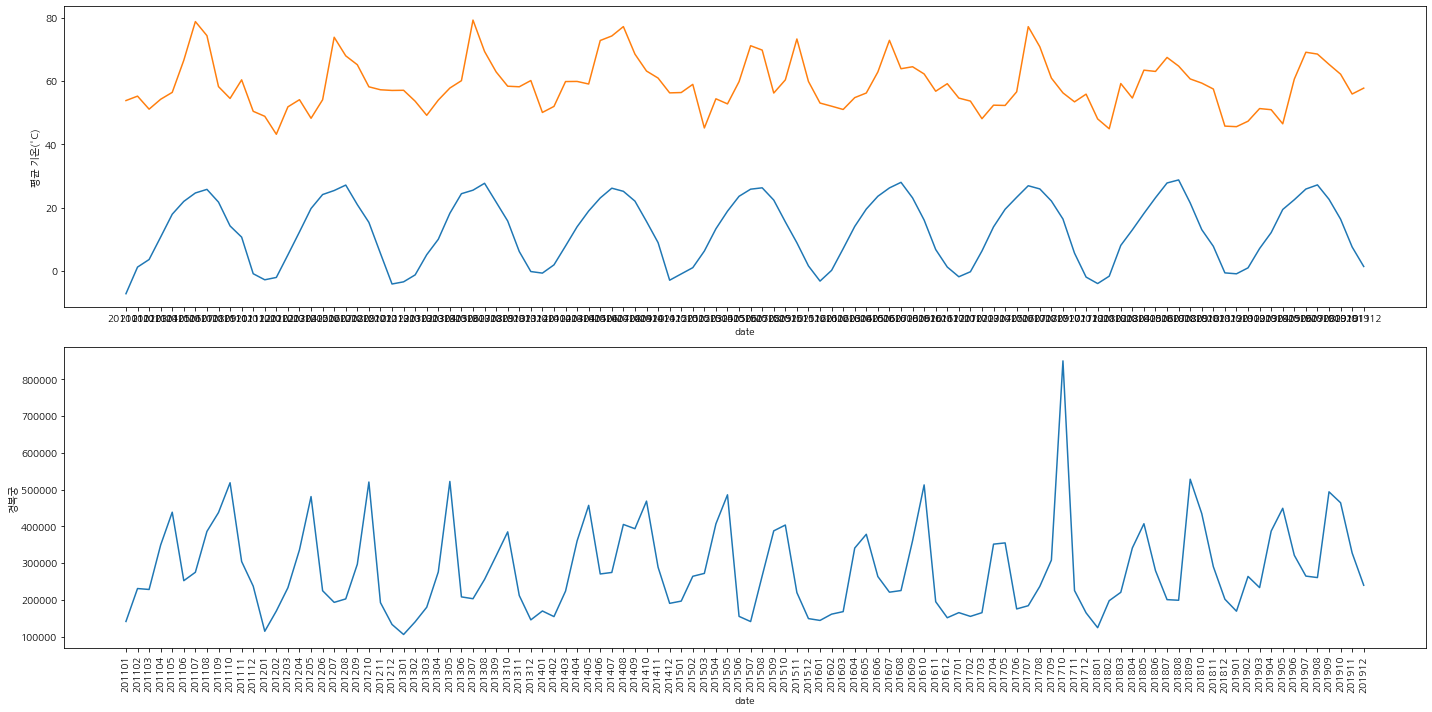

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '경복궁', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
import statsmodels.api as sm
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['경복궁']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    경복궁   R-squared:                       0.447
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     13.59
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           2.97e-11
Time:                        08:16:37   Log-Likelihood:                -1388.0
No. Observations:                 108   AIC:                             2790.
Df Residuals:                     101   BIC:                             2809.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.781e+04   2.05e+05     -0.282      0.778   -4.64e+05    3.49e+05
평균 기온(°C)      -9.38e+04   1.92e+04     -4.878      0.000   -1.32e+05   -5.56e+04
최고 기온(°C)      1.034e+05   1.88e+04      5.504      0.000    6.61e+04    1.41e+05
일강수량(mm)       -450.7489   1769.342     -0.255      0.799   -3960.647    3059.150
평균 풍속(m/s)     6750.9892   2.06e+04      0.327      0.744   -3.42e+04    4.77e+04
평균 상대습도(%)    -1779.6134   2604.800     -0.683      0.496   -6946.836    3387.609
합계 일사량(MJ/m2) -1.493e+04   4389.480     -3.402      0.001   -2.36e+04   -6223.849
==============================================================================
Omnibus:                        7.127   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                7.295
Skew:                           0.449   Prob(JB):                       0.0261
Kurtosis:                       3.902   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 종묘

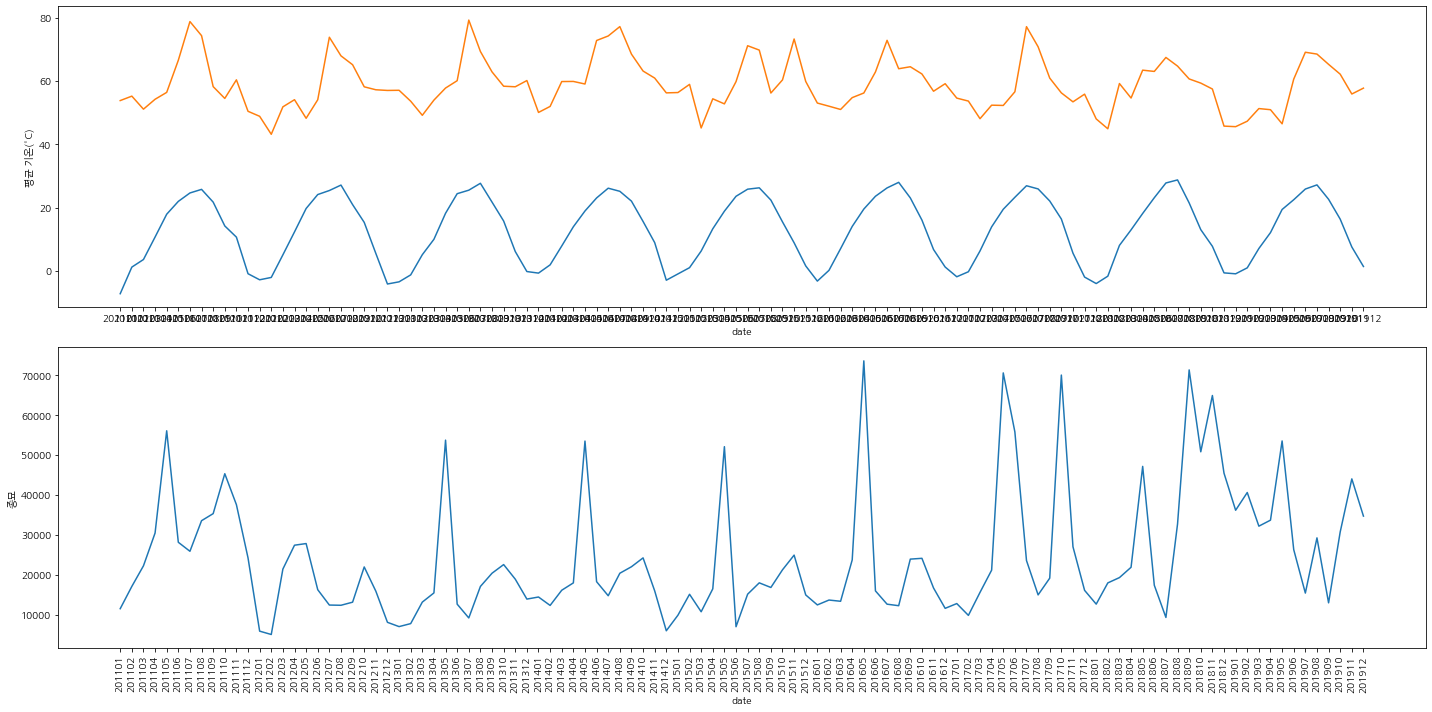

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '종묘', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['종묘']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     종묘   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     6.158
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.57e-05
Time:                        08:16:40   Log-Likelihood:                -1180.7
No. Observations:                 108   AIC:                             2375.
Df Residuals:                     101   BIC:                             2394.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.438e+04   3.01e+04      1.143      0.256   -2.53e+04     9.4e+04
평균 기온(°C)     -5669.7706   2822.470     -2.009      0.047   -1.13e+04     -70.749
최고 기온(°C)      6075.7411   2757.322      2.203      0.030     605.956    1.15e+04
일강수량(mm)        212.4928    259.694      0.818      0.415    -302.669     727.655
평균 풍속(m/s)    -7749.1133   3030.708     -2.557      0.012   -1.38e+04   -1737.004
평균 상대습도(%)     -462.9797    382.317     -1.211      0.229   -1221.394     295.435
합계 일사량(MJ/m2)    -4.4767    644.262     -0.007      0.994   -1282.519    1273.566
==============================================================================
Omnibus:                       13.516   Durbin-Watson:                   1.608
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.599
Skew:                           0.869   Prob(JB):                     0.000676
Kurtosis:                       3.476   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 창경궁

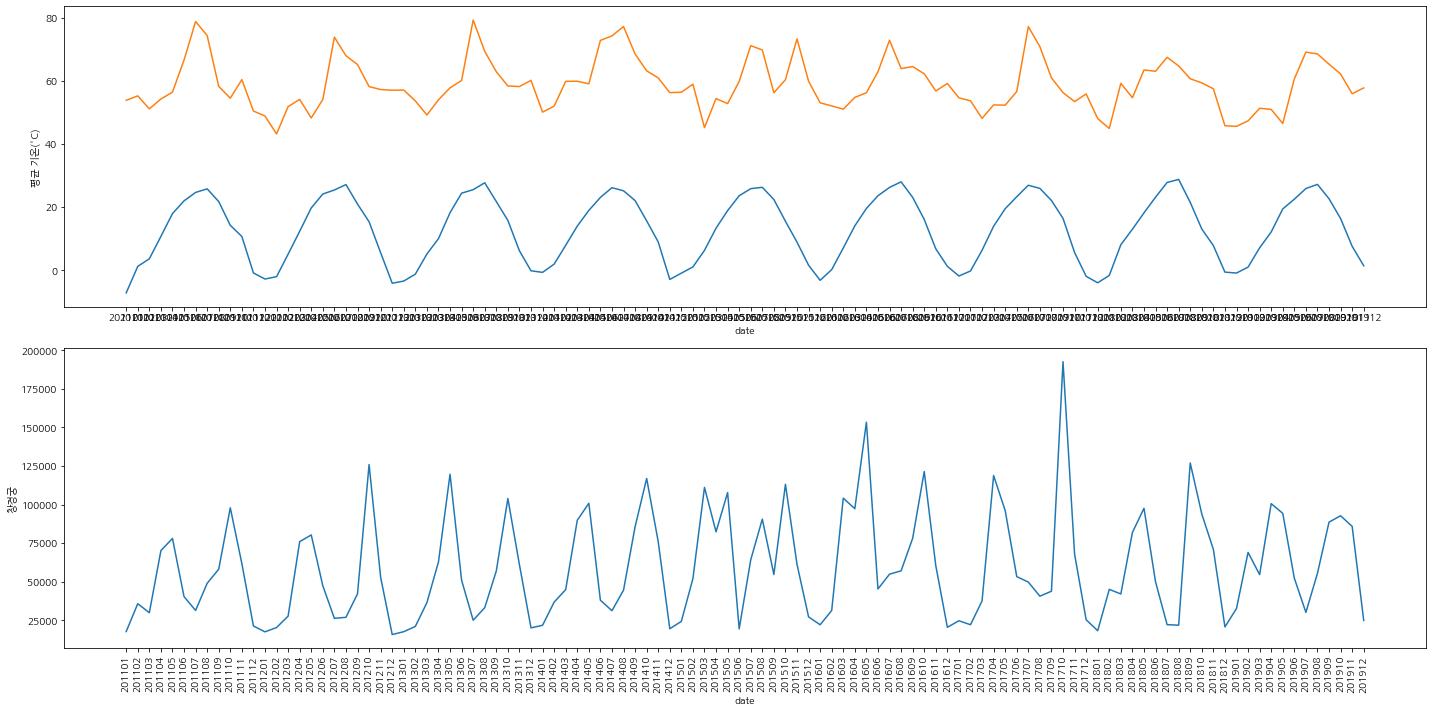

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '창경궁', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['창경궁']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    창경궁   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     20.67
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.14e-15
Time:                        08:16:43   Log-Likelihood:                -1239.5
No. Observations:                 108   AIC:                             2493.
Df Residuals:                     101   BIC:                             2512.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.004e+05   5.18e+04     -1.937      0.056   -2.03e+05    2409.849
평균 기온(°C)     -3.778e+04   4865.314     -7.765      0.000   -4.74e+04   -2.81e+04
최고 기온(°C)      3.975e+04   4753.013      8.363      0.000    3.03e+04    4.92e+04
일강수량(mm)        281.6198    447.654      0.629      0.531    -606.406    1169.646
평균 풍속(m/s)     1693.6627   5224.270      0.324      0.746   -8669.884    1.21e+04
평균 상대습도(%)     -161.1213    659.030     -0.244      0.807   -1468.460    1146.218
합계 일사량(MJ/m2) -4285.5610   1110.565     -3.859      0.000   -6488.624   -2082.498
==============================================================================
Omnibus:                        5.066   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                7.205
Skew:                           0.045   Prob(JB):                       0.0273
Kurtosis:                       4.262   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 창덕궁

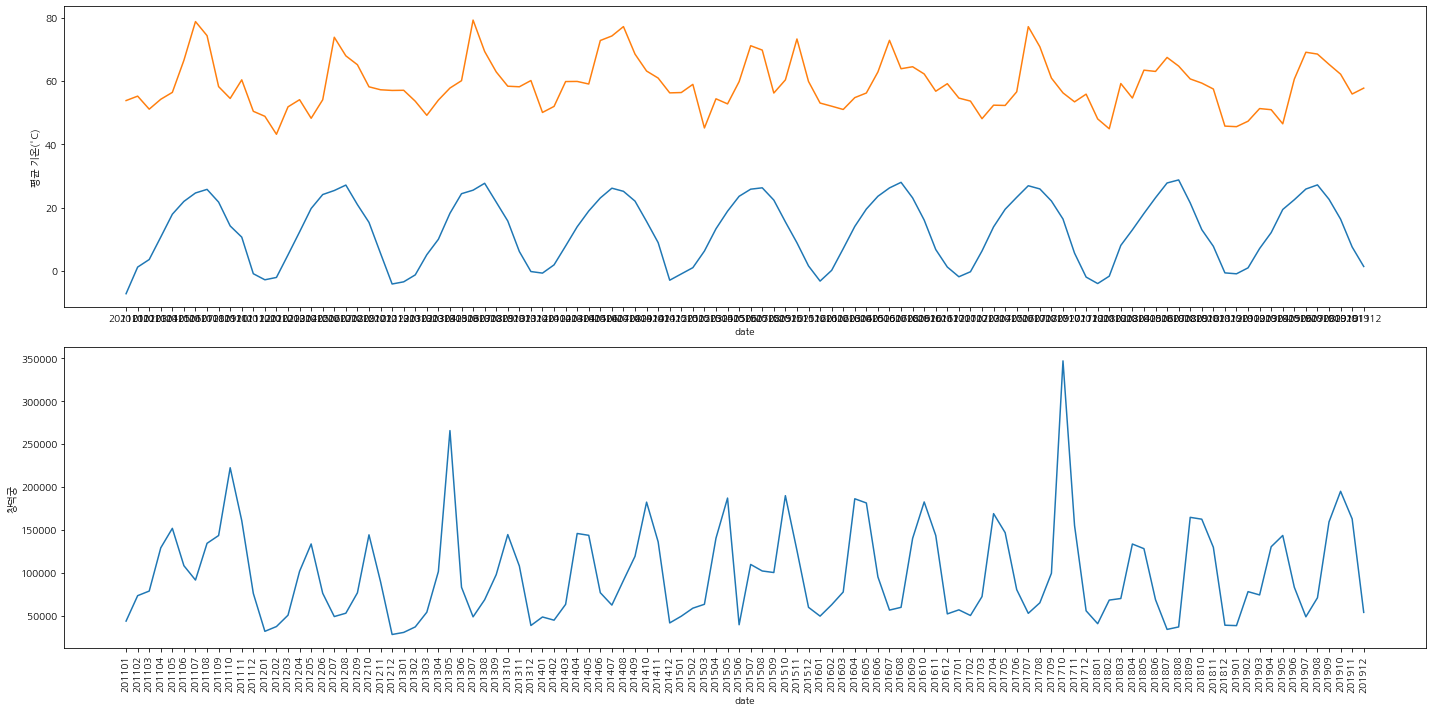

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '창덕궁', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['창덕궁']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    창덕궁   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     15.69
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.18e-12
Time:                        08:16:47   Log-Likelihood:                -1297.7
No. Observations:                 108   AIC:                             2609.
Df Residuals:                     101   BIC:                             2628.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.292e+05   8.88e+04     -1.454      0.149   -3.05e+05     4.7e+04
평균 기온(°C)     -5.741e+04   8336.681     -6.886      0.000   -7.39e+04   -4.09e+04
최고 기온(°C)      6.139e+04   8144.253      7.537      0.000    4.52e+04    7.75e+04
일강수량(mm)        110.0976    767.052      0.144      0.886   -1411.528    1631.723
평균 풍속(m/s)     9464.9326   8951.749      1.057      0.293   -8292.929    2.72e+04
평균 상대습도(%)     -358.6828   1129.244     -0.318      0.751   -2598.799    1881.433
합계 일사량(MJ/m2) -9586.5738   1902.946     -5.038      0.000   -1.34e+04   -5811.642
==============================================================================
Omnibus:                        9.285   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               11.371
Skew:                           0.476   Prob(JB):                      0.00339
Kurtosis:                       4.273   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#남산골한옥마을

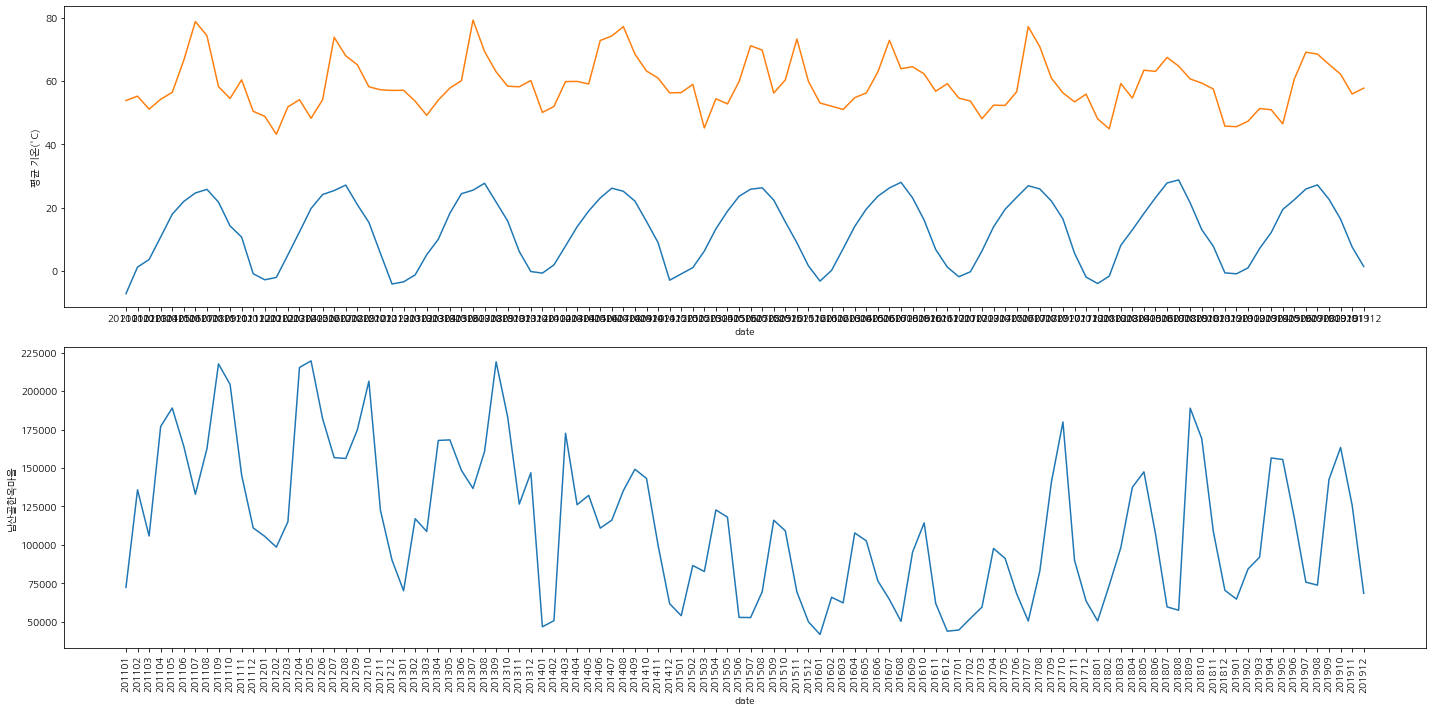

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '남산골한옥마을', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['남산골한옥마을']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                남산골한옥마을   R-squared:                       0.266
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     6.088
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.80e-05
Time:                        08:16:50   Log-Likelihood:                -1299.2
No. Observations:                 108   AIC:                             2612.
Df Residuals:                     101   BIC:                             2631.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.811e+05      9e+04      2.011      0.047    2462.562     3.6e+05
평균 기온(°C)     -2325.5730   8450.488     -0.275      0.784   -1.91e+04    1.44e+04
최고 기온(°C)      6233.7788   8255.433      0.755      0.452   -1.01e+04    2.26e+04
일강수량(mm)       1080.5872    777.524      1.390      0.168    -461.811    2622.985
평균 풍속(m/s)     2.921e+04   9073.952      3.220      0.002    1.12e+04    4.72e+04
평균 상대습도(%)    -3040.5304   1144.659     -2.656      0.009   -5311.227    -769.834
합계 일사량(MJ/m2) -3802.7359   1928.923     -1.971      0.051   -7629.201      23.729
==============================================================================
Omnibus:                        2.252   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.324   Jarque-Bera (JB):                1.889
Skew:                           0.191   Prob(JB):                        0.389
Kurtosis:                       2.477   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 덕수궁

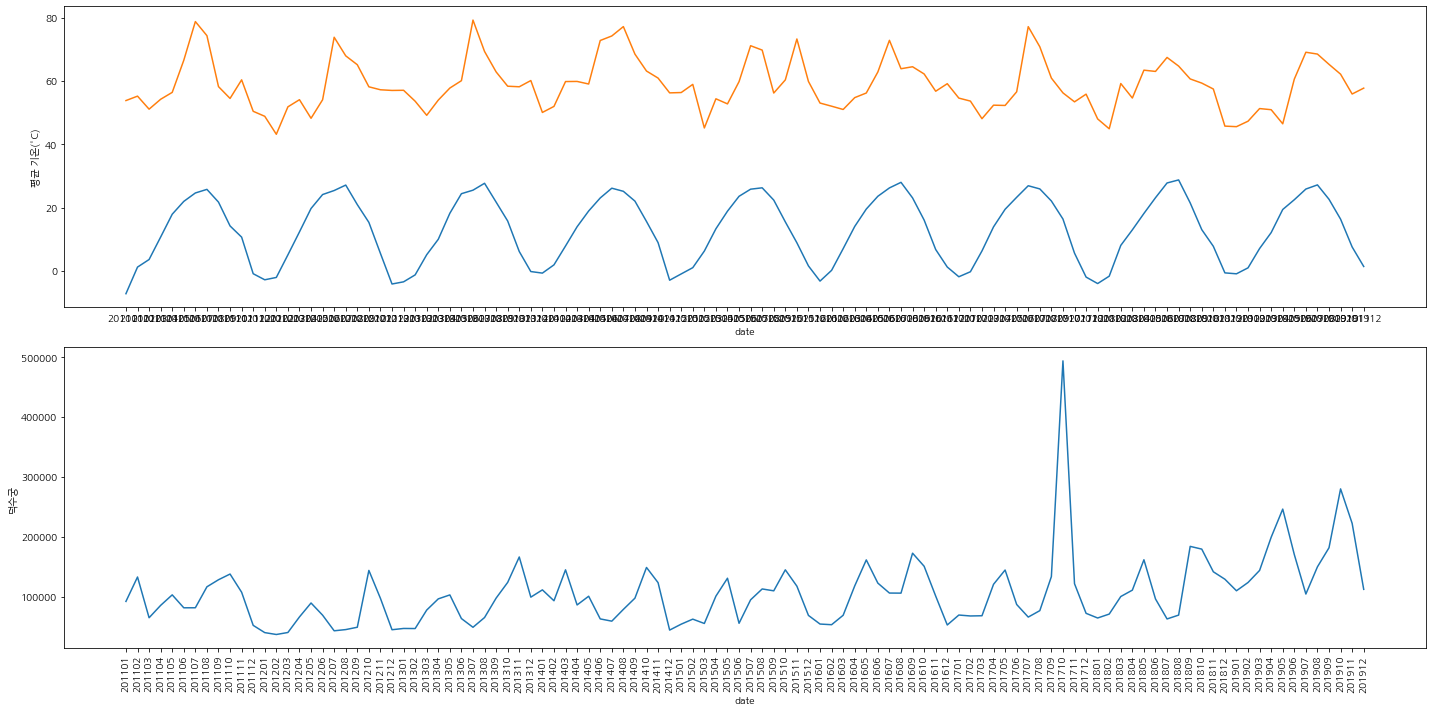

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '덕수궁', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['덕수궁']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    덕수궁   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     11.51
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           8.88e-10
Time:                        08:16:53   Log-Likelihood:                -1311.6
No. Observations:                 108   AIC:                             2637.
Df Residuals:                     101   BIC:                             2656.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.302e+04   1.01e+05      0.327      0.744   -1.67e+05    2.33e+05
평균 기온(°C)     -4.533e+04   9482.368     -4.781      0.000   -6.41e+04   -2.65e+04
최고 기온(°C)      4.819e+04   9263.496      5.203      0.000    2.98e+04    6.66e+04
일강수량(mm)       -616.0284    872.466     -0.706      0.482   -2346.767    1114.710
평균 풍속(m/s)    -3.595e+04   1.02e+04     -3.530      0.001   -5.61e+04   -1.57e+04
평균 상대습도(%)     -138.3463   1284.433     -0.108      0.914   -2686.315    2409.622
합계 일사량(MJ/m2) -7613.6290   2164.462     -3.518      0.001   -1.19e+04   -3319.918
==============================================================================
Omnibus:                       66.955   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              380.366
Skew:                           2.006   Prob(JB):                     2.54e-83
Kurtosis:                      11.272   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

17년 10월 궁에 무슨일이 있었을까? 모든 궁이 관광객이 엄청 높다.

## 서울시립미술관 본관

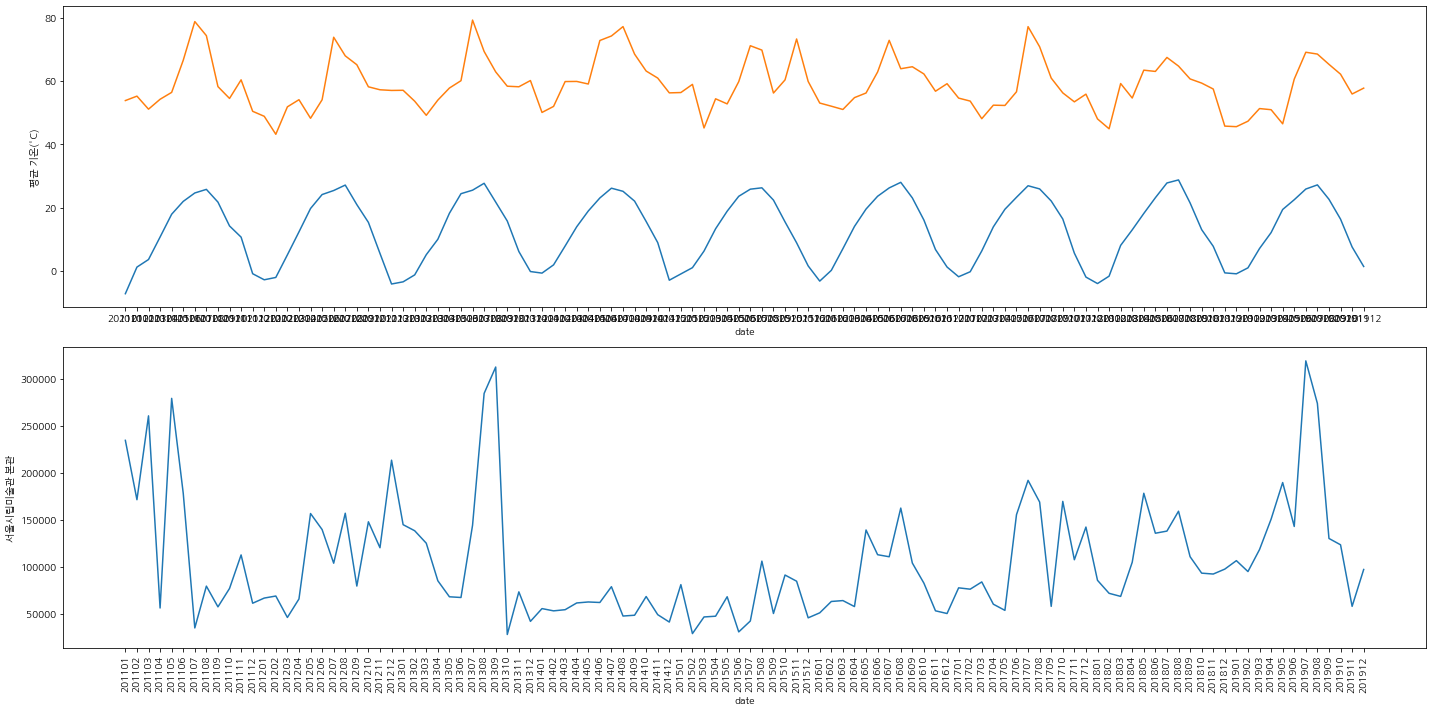

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '서울시립미술관 본관', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['서울시립미술관 본관']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             서울시립미술관 본관   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     5.857
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           2.85e-05
Time:                        08:16:56   Log-Likelihood:                -1330.5
No. Observations:                 108   AIC:                             2675.
Df Residuals:                     101   BIC:                             2694.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.968e+05    1.2e+05      4.127      0.000    2.58e+05    7.36e+05
평균 기온(°C)      5.508e+04   1.13e+04      4.876      0.000    3.27e+04    7.75e+04
최고 기온(°C)     -5.376e+04    1.1e+04     -4.871      0.000   -7.57e+04   -3.19e+04
일강수량(mm)        -16.7805   1039.438     -0.016      0.987   -2078.745    2045.184
평균 풍속(m/s)    -2.696e+04   1.21e+04     -2.223      0.028    -5.1e+04   -2897.951
평균 상대습도(%)    -2810.4449   1530.245     -1.837      0.069   -5846.040     225.150
합계 일사량(MJ/m2)  6418.8112   2578.693      2.489      0.014    1303.377    1.15e+04
==============================================================================
Omnibus:                       25.658   Durbin-Watson:                   1.471
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.744
Skew:                           1.182   Prob(JB):                     1.73e-08
Kurtosis:                       4.534   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

실내 관광지라 그런지 계절 / 날씨에 크게 영향이 없는 것 같다.

## 국립중앙박물관

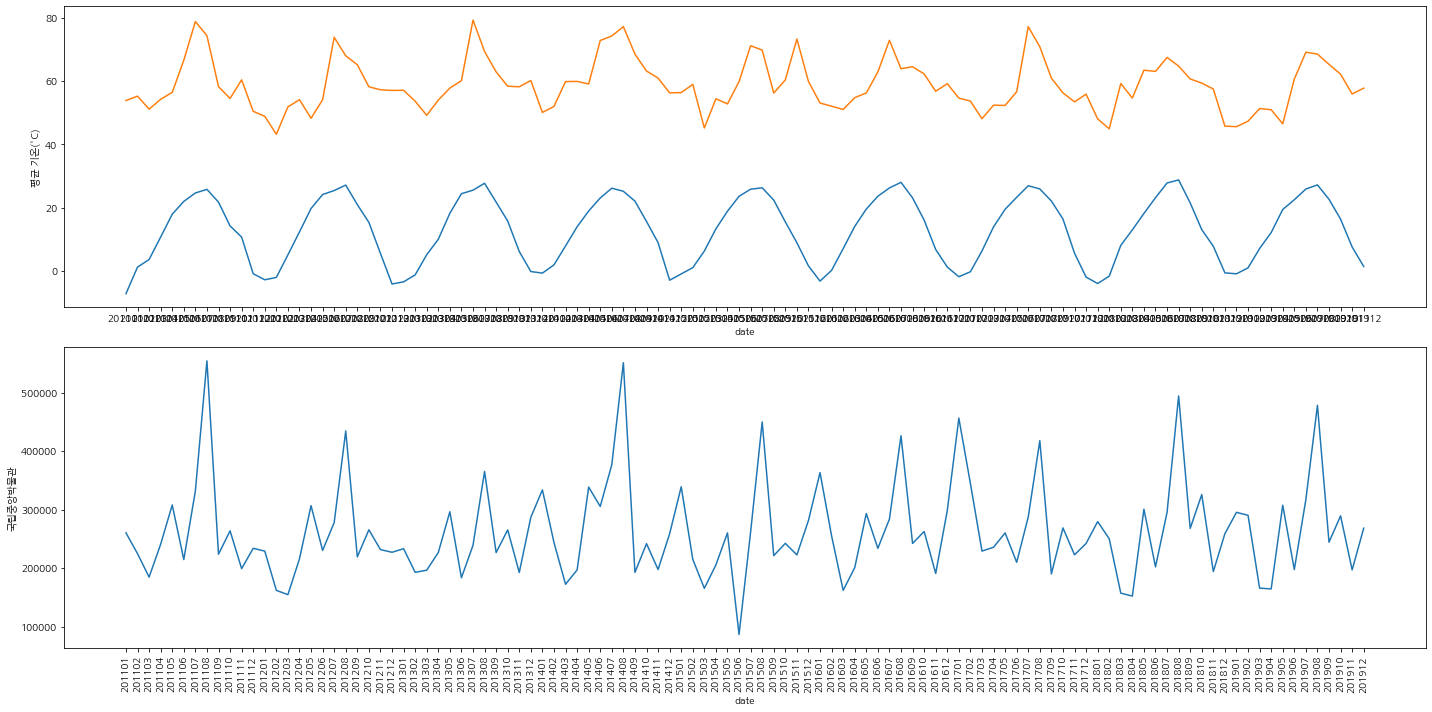

In [ ]:

fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '국립중앙박물관', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['국립중앙박물관']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                국립중앙박물관   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     5.247
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           9.68e-05
Time:                        08:16:59   Log-Likelihood:                -1362.0
No. Observations:                 108   AIC:                             2738.
Df Residuals:                     101   BIC:                             2757.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.534e+05   1.61e+05      2.194      0.031    3.39e+04    6.73e+05
평균 기온(°C)      3.731e+04   1.51e+04      2.469      0.015    7328.434    6.73e+04
최고 기온(°C)     -3.564e+04   1.48e+04     -2.413      0.018   -6.49e+04   -6342.656
일강수량(mm)      -1790.1809   1390.782     -1.287      0.201   -4549.118     968.756
평균 풍속(m/s)     -2.35e+04   1.62e+04     -1.448      0.151   -5.57e+04    8702.075
평균 상대습도(%)     1956.2734   2047.489      0.955      0.342   -2105.394    6017.941
합계 일사량(MJ/m2)  1149.2789   3450.328      0.333      0.740   -5695.243    7993.801
==============================================================================
Omnibus:                       11.005   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.248
Skew:                           0.753   Prob(JB):                      0.00361
Kurtosis:                       3.478   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 서울약령시 한의약박물관

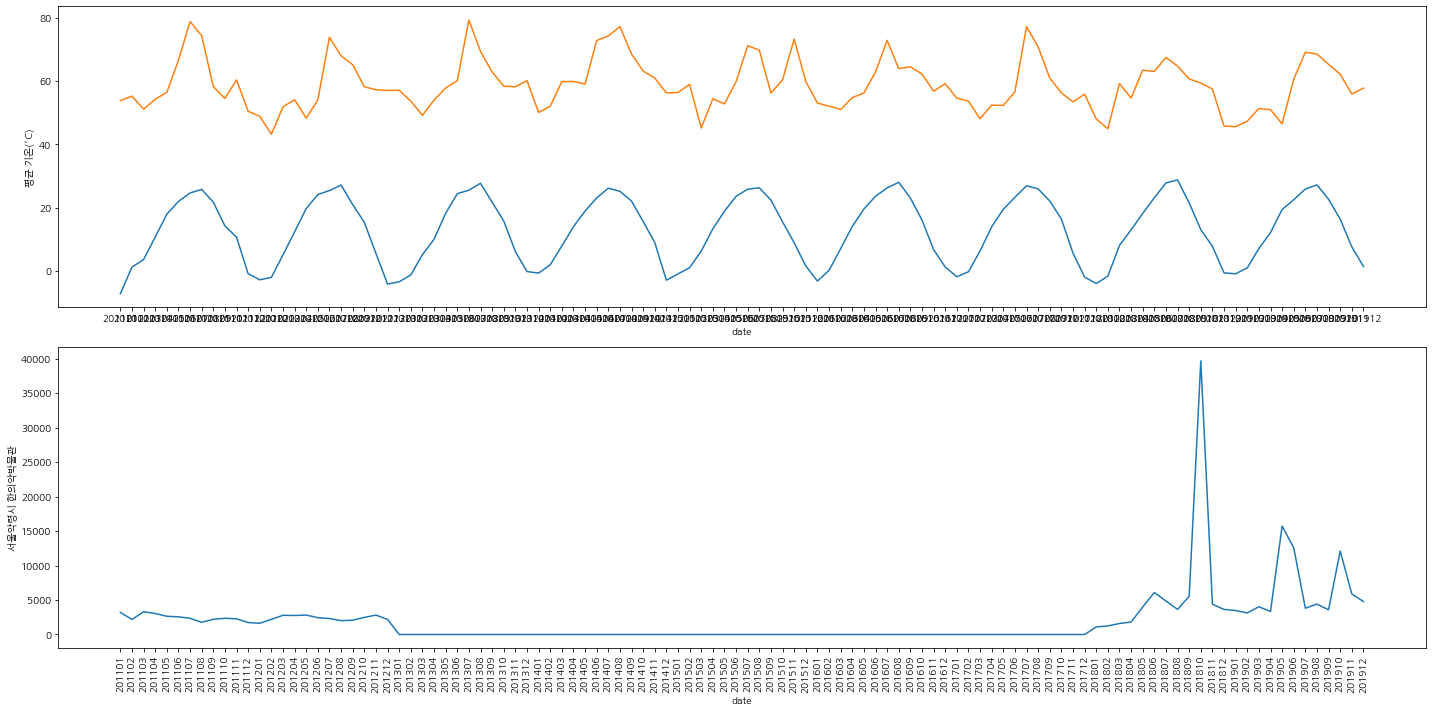

In [ ]:

fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '서울약령시 한의약박물관', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['서울약령시 한의약박물관']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           서울약령시 한의약박물관   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     3.768
Date:                Thu, 01 Jul 2021   Prob (F-statistic):            0.00199
Time:                        08:17:02   Log-Likelihood:                -1050.4
No. Observations:                 108   AIC:                             2115.
Df Residuals:                     101   BIC:                             2134.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          9598.9923   8995.374      1.067      0.288   -8245.409    2.74e+04
평균 기온(°C)         9.8977    844.210      0.012      0.991   -1664.788    1684.583
최고 기온(°C)      -134.7596    824.724     -0.163      0.871   -1770.790    1501.271
일강수량(mm)        131.6289     77.675      1.695      0.093     -22.458     285.716
평균 풍속(m/s)    -3697.5916    906.495     -4.079      0.000   -5495.833   -1899.350
평균 상대습도(%)      -29.4470    114.352     -0.258      0.797    -256.291     197.397
합계 일사량(MJ/m2)   342.8558    192.701      1.779      0.078     -39.411     725.123
==============================================================================
Omnibus:                      165.704   Durbin-Watson:                   1.623
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9270.724
Skew:                           5.745   Prob(JB):                         0.00
Kurtosis:                      46.910   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 세종대왕기념관

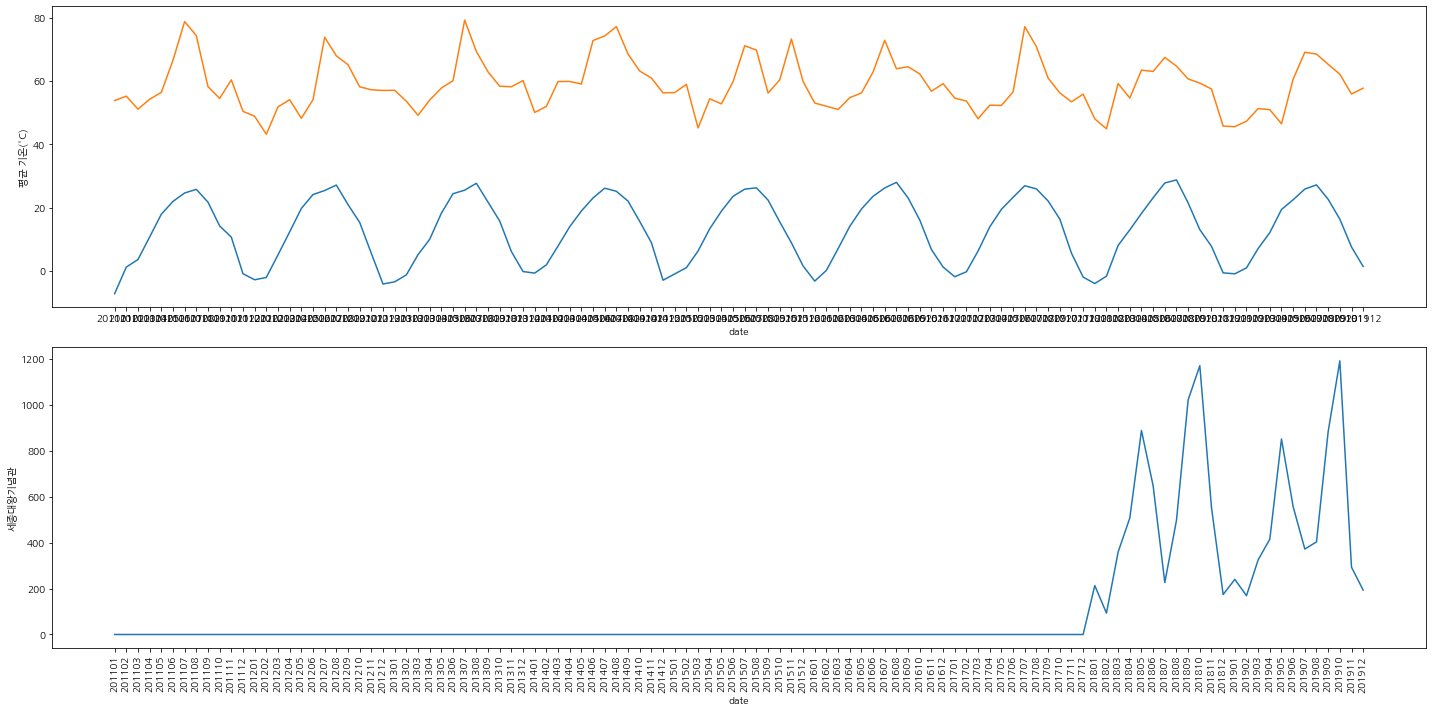

In [ ]:

fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '세종대왕기념관', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['세종대왕기념관']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                세종대왕기념관   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     11.57
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           7.98e-10
Time:                        08:17:05   Log-Likelihood:                -725.73
No. Observations:                 108   AIC:                             1465.
Df Residuals:                     101   BIC:                             1484.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           374.6920    445.198      0.842      0.402    -508.461    1257.845
평균 기온(°C)        -7.6406     41.782     -0.183      0.855     -90.524      75.243
최고 기온(°C)        -3.5965     40.817     -0.088      0.930     -84.567      77.374
일강수량(mm)          4.4516      3.844      1.158      0.250      -3.174      12.078
평균 풍속(m/s)     -341.7012     44.864     -7.616      0.000    -430.700    -252.703
평균 상대습도(%)        4.9965      5.660      0.883      0.379      -6.230      16.223
합계 일사량(MJ/m2)    31.6855      9.537      3.322      0.001      12.766      50.605
==============================================================================
Omnibus:                       72.020   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              352.434
Skew:                           2.301   Prob(JB):                     2.95e-77
Kurtosis:                      10.560   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 태릉,강릉,조선왕릉전시관

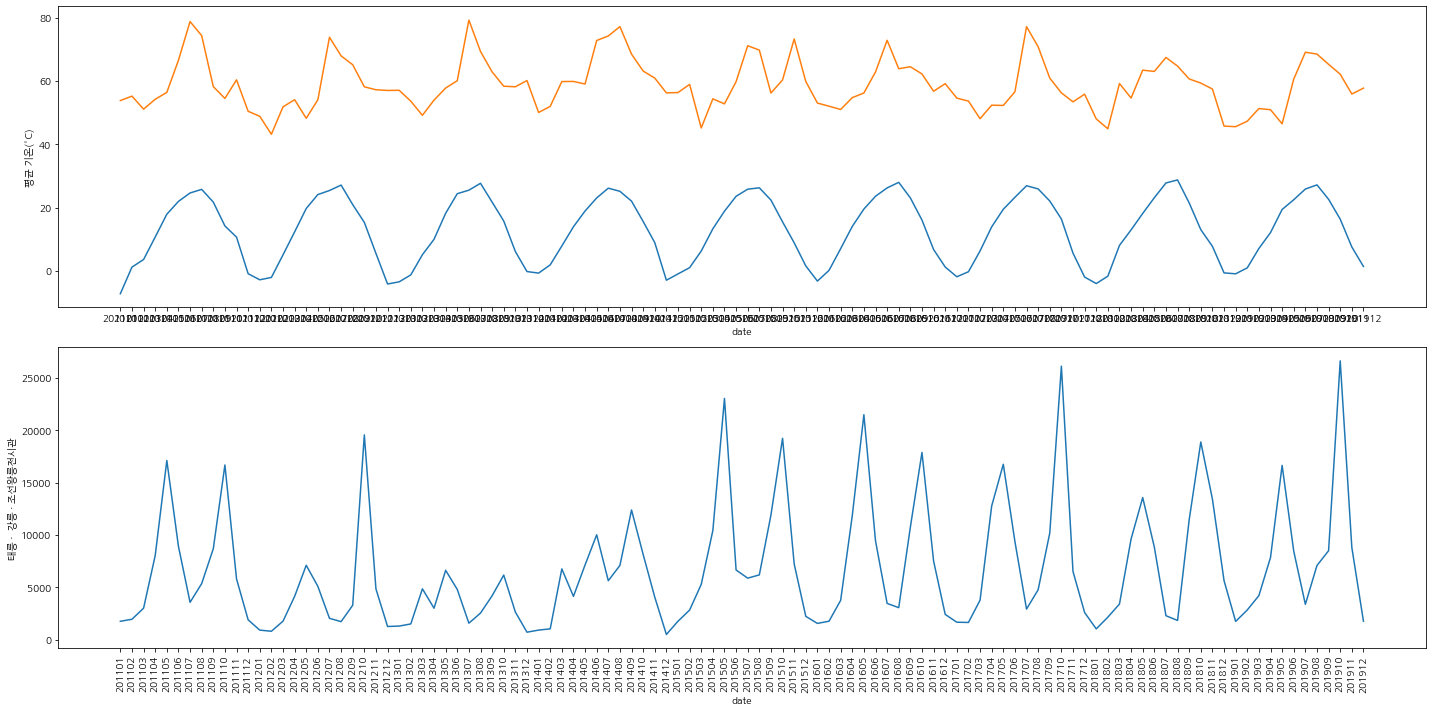

In [ ]:

fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '태릉 ·  강릉 · 조선왕릉전시관', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['태릉 ·  강릉 · 조선왕릉전시관']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     태릉 ·  강릉 · 조선왕릉전시관   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     16.96
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.84e-13
Time:                        08:17:08   Log-Likelihood:                -1051.7
No. Observations:                 108   AIC:                             2117.
Df Residuals:                     101   BIC:                             2136.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.986e+04   9105.613     -2.181      0.032   -3.79e+04   -1794.664
평균 기온(°C)     -5549.0596    854.556     -6.493      0.000   -7244.269   -3853.850
최고 기온(°C)      5795.0808    834.831      6.942      0.000    4139.000    7451.161
일강수량(mm)          3.8332     78.627      0.049      0.961    -152.142     159.808
평균 풍속(m/s)    -1381.8049    917.604     -1.506      0.135   -3202.084     438.474
평균 상대습도(%)       74.7658    115.754      0.646      0.520    -154.858     304.390
합계 일사량(MJ/m2)  -439.2581    195.062     -2.252      0.026    -826.210     -52.307
==============================================================================
Omnibus:                       20.333   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.067
Skew:                           0.991   Prob(JB):                     2.19e-06
Kurtosis:                       4.367   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 서대문자연사박물관

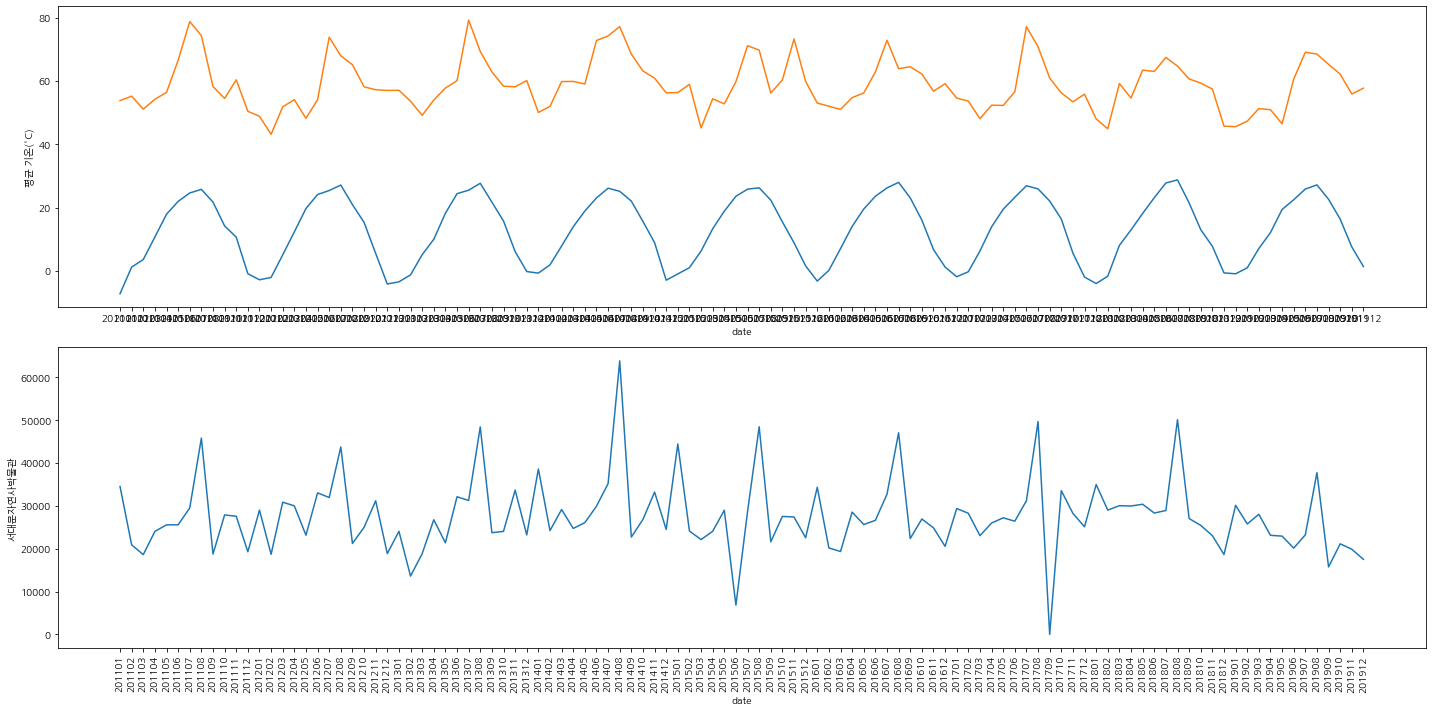

In [ ]:

fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '서대문자연사박물관', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['서대문자연사박물관']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문자연사박물관   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     4.335
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           0.000621
Time:                        08:17:11   Log-Likelihood:                -1121.0
No. Observations:                 108   AIC:                             2256.
Df Residuals:                     101   BIC:                             2275.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           3.46e+04   1.73e+04      2.001      0.048     293.979    6.89e+04
평균 기온(°C)      3538.2390   1623.131      2.180      0.032     318.384    6758.094
최고 기온(°C)     -3241.5623   1585.666     -2.044      0.044   -6387.097     -96.028
일강수량(mm)       -186.7624    149.343     -1.251      0.214    -483.019     109.494
평균 풍속(m/s)      498.2920   1742.883      0.286      0.776   -2959.120    3955.704
평균 상대습도(%)      118.8688    219.861      0.541      0.590    -317.276     555.014
합계 일사량(MJ/m2)  -161.5256    370.499     -0.436      0.664    -896.496     573.444
==============================================================================
Omnibus:                        9.126   Durbin-Watson:                   2.456
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               20.698
Skew:                           0.049   Prob(JB):                     3.20e-05
Kurtosis:                       5.142   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

http://www.esdmnews.com/board_view_info.php?idx=68376&s_where=&s_word=&page_num=369&seq=135

17년 9월 한달간 휴관

##서대문형무소역사관

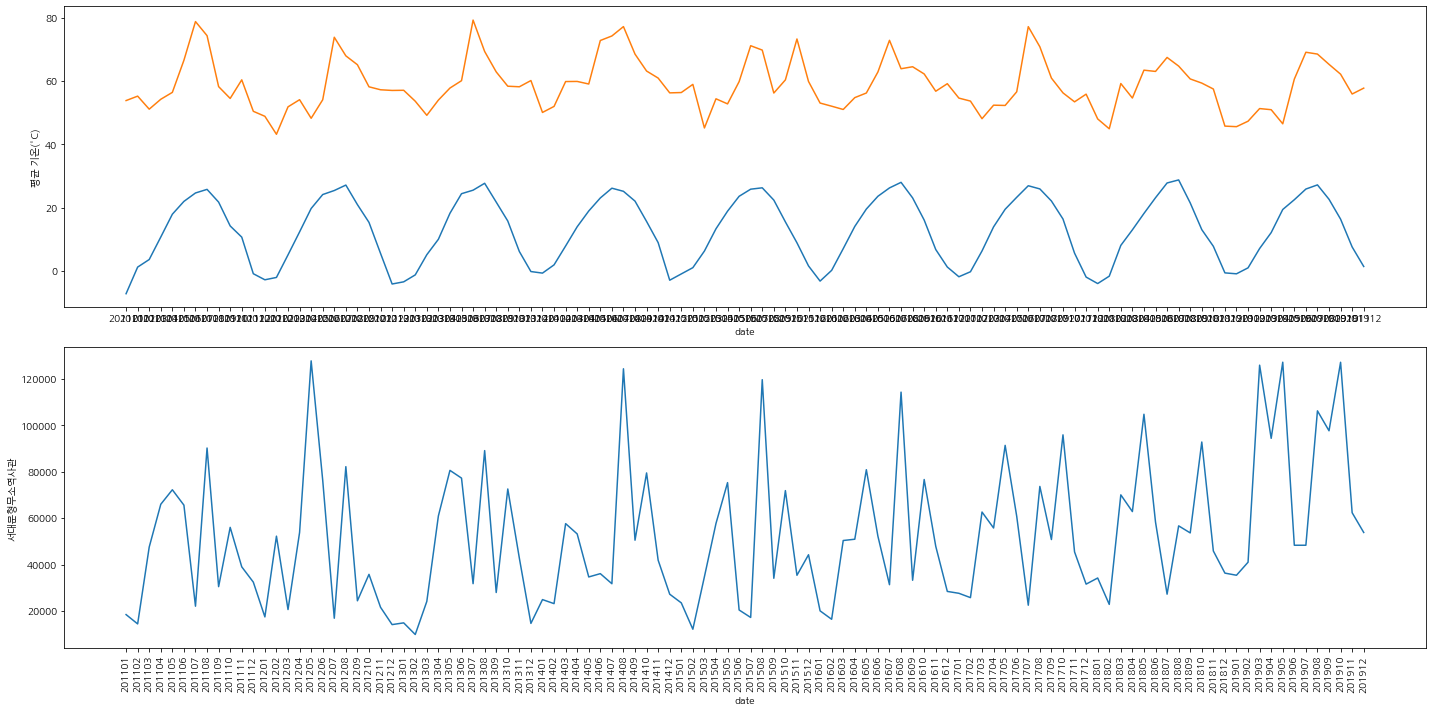

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '서대문형무소역사관', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['서대문형무소역사관']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              서대문형무소역사관   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     9.551
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           2.64e-08
Time:                        08:17:14   Log-Likelihood:                -1242.8
No. Observations:                 108   AIC:                             2500.
Df Residuals:                     101   BIC:                             2518.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.325e+04   5.34e+04      0.809      0.420   -6.28e+04    1.49e+05
평균 기온(°C)     -5923.3600   5014.840     -1.181      0.240   -1.59e+04    4024.733
최고 기온(°C)      7784.2394   4899.087      1.589      0.115   -1934.231    1.75e+04
일강수량(mm)       -899.7072    461.412     -1.950      0.054   -1815.025      15.610
평균 풍속(m/s)    -7291.4065   5384.827     -1.354      0.179    -1.8e+04    3390.642
평균 상대습도(%)     -464.3537    679.284     -0.684      0.496   -1811.871     883.164
합계 일사량(MJ/m2)   -67.1626   1144.696     -0.059      0.953   -2337.932    2203.607
==============================================================================
Omnibus:                        6.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                5.621
Skew:                           0.504   Prob(JB):                       0.0602
Kurtosis:                       3.482   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 트릭아이미술관

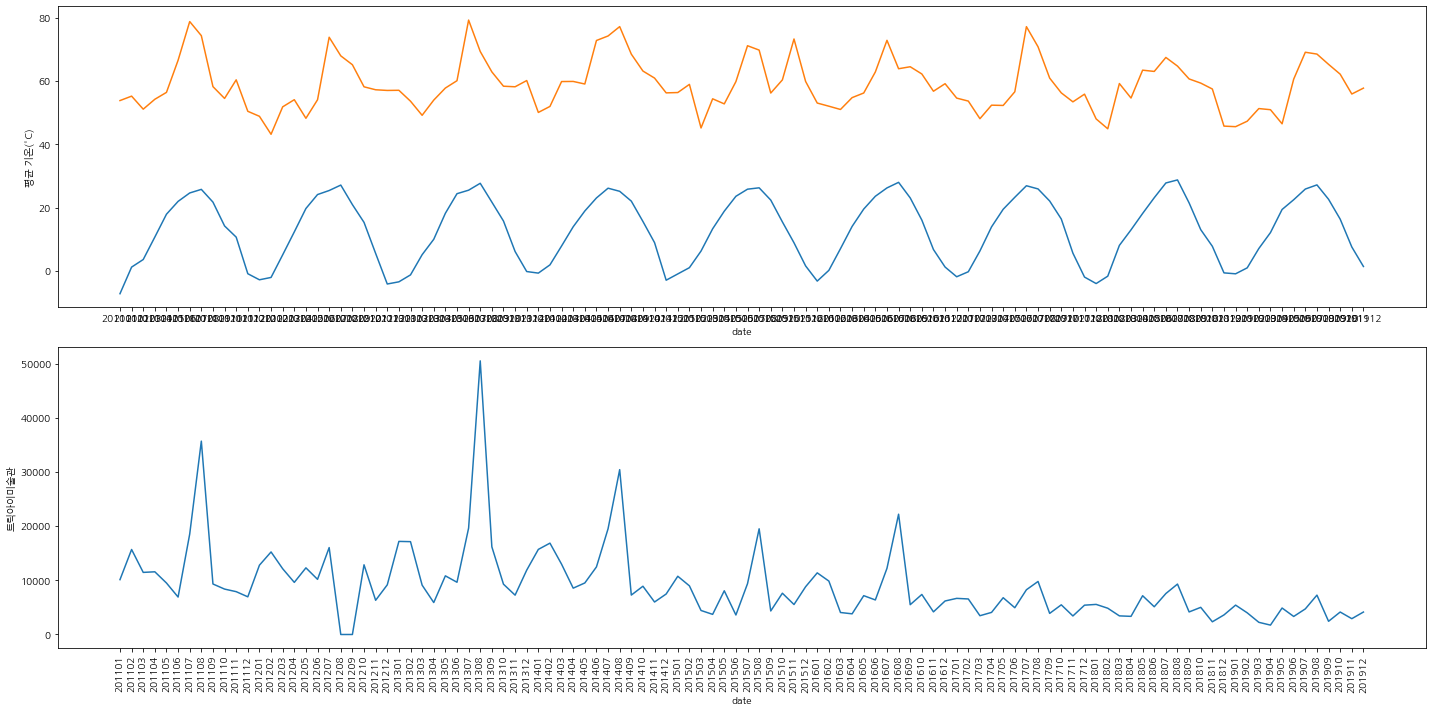

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '트릭아이미술관', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['트릭아이미술관']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                트릭아이미술관   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     9.595
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           2.44e-08
Time:                        08:17:17   Log-Likelihood:                -1084.2
No. Observations:                 108   AIC:                             2182.
Df Residuals:                     101   BIC:                             2201.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8497.2008   1.23e+04      0.691      0.491   -1.59e+04    3.29e+04
평균 기온(°C)      4452.1582   1154.884      3.855      0.000    2161.180    6743.137
최고 기온(°C)     -4293.5938   1128.227     -3.806      0.000   -6531.692   -2055.496
일강수량(mm)       -237.1119    106.260     -2.231      0.028    -447.903     -26.321
평균 풍속(m/s)     4763.1904   1240.089      3.841      0.000    2303.187    7223.194
평균 상대습도(%)      127.3969    156.435      0.814      0.417    -182.927     437.721
합계 일사량(MJ/m2)   153.0230    263.616      0.580      0.563    -369.920     675.966
==============================================================================
Omnibus:                       58.617   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              337.982
Skew:                           1.676   Prob(JB):                     4.06e-74
Kurtosis:                      10.992   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##헌릉ㆍ인릉

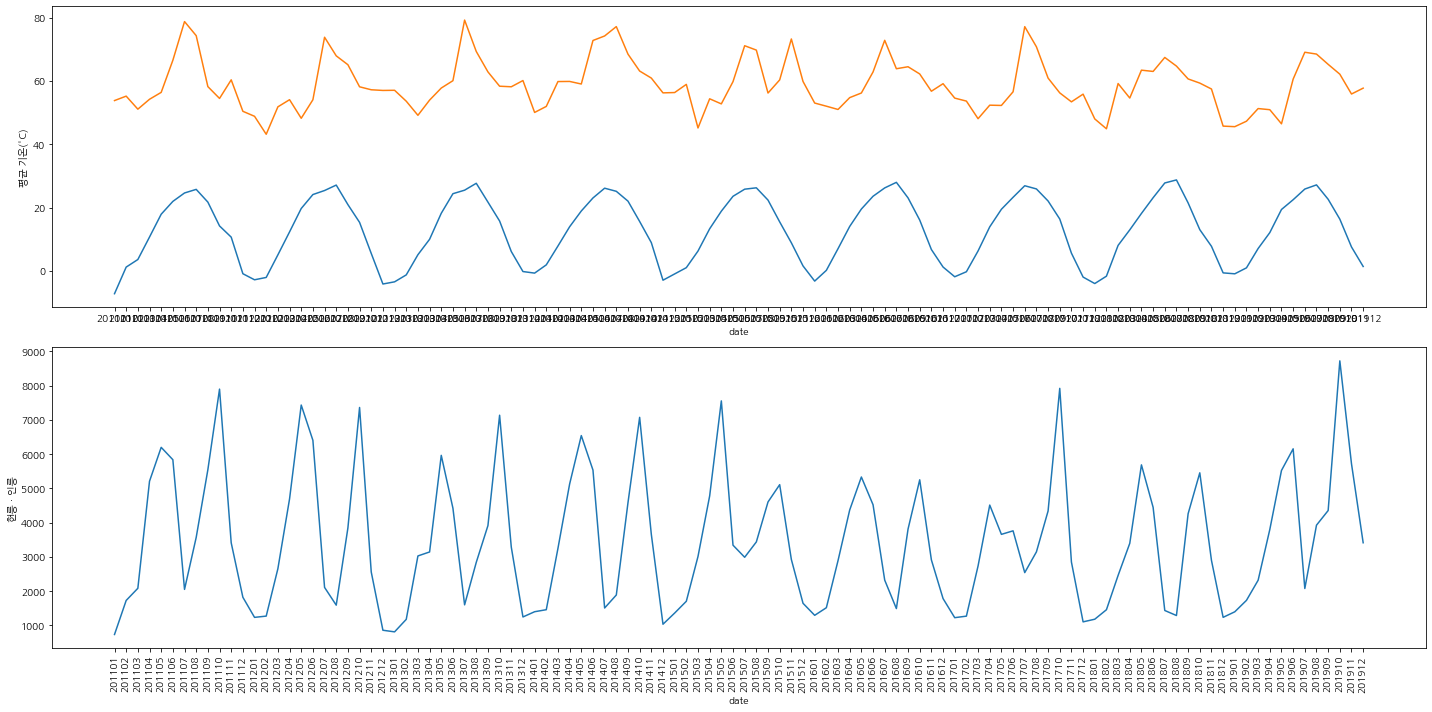

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '헌릉ㆍ인릉', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['헌릉ㆍ인릉']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  헌릉ㆍ인릉   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     21.02
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           7.29e-16
Time:                        08:17:20   Log-Likelihood:                -926.95
No. Observations:                 108   AIC:                             1868.
Df Residuals:                     101   BIC:                             1887.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4928.4360   2869.009     -1.718      0.089   -1.06e+04     762.905
평균 기온(°C)     -1597.0607    269.255     -5.931      0.000   -2131.190   -1062.932
최고 기온(°C)      1731.4049    263.040      6.582      0.000    1209.605    2253.205
일강수량(mm)         -9.3373     24.774     -0.377      0.707     -58.482      39.808
평균 풍속(m/s)      486.8966    289.120      1.684      0.095     -86.639    1060.433
평균 상대습도(%)      -14.7600     36.472     -0.405      0.687     -87.110      57.590
합계 일사량(MJ/m2)  -152.4474     61.461     -2.480      0.015    -274.369     -30.526
==============================================================================
Omnibus:                        6.270   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                5.791
Skew:                           0.472   Prob(JB):                       0.0553
Kurtosis:                       3.629   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##선릉·정릉

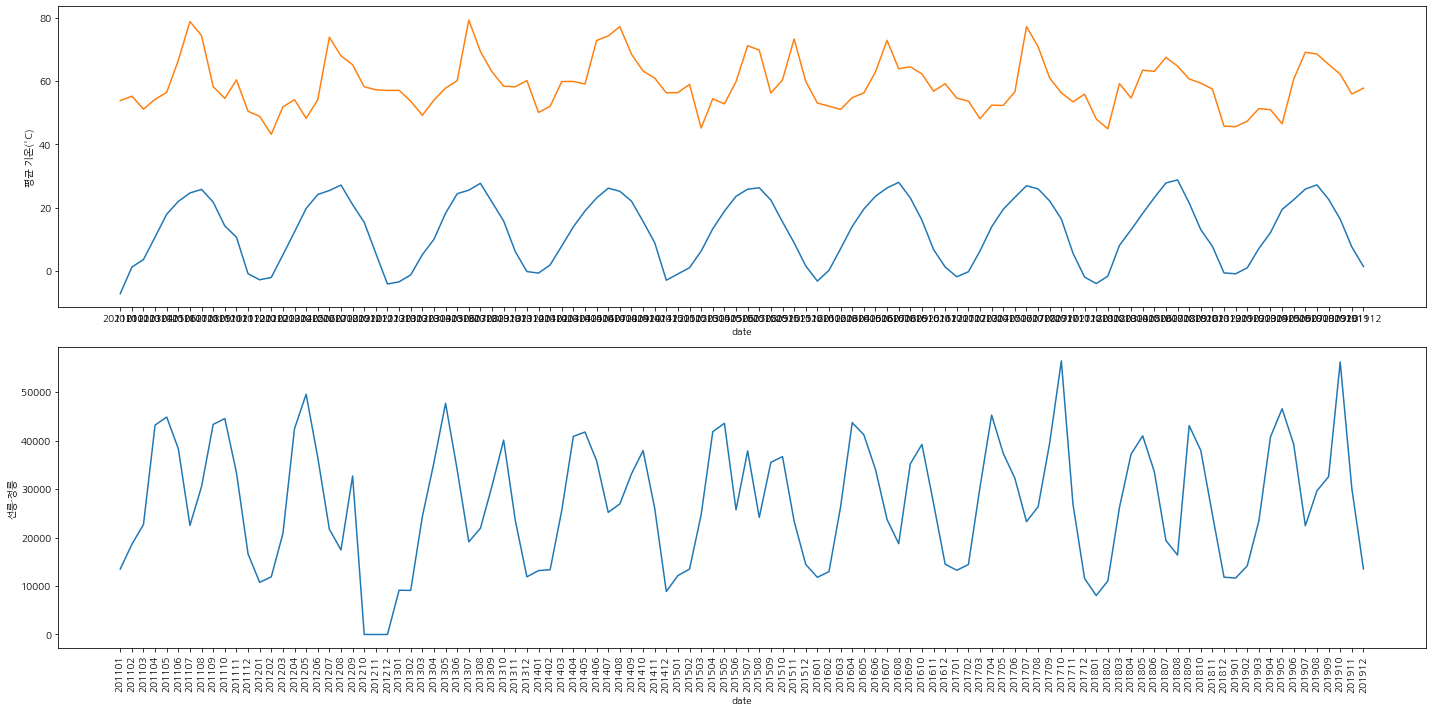

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '선릉·정릉', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['선릉·정릉']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  선릉·정릉   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     27.90
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.98e-19
Time:                        08:17:24   Log-Likelihood:                -1120.8
No. Observations:                 108   AIC:                             2256.
Df Residuals:                     101   BIC:                             2274.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.616e+04   1.73e+04     -2.094      0.039   -7.04e+04   -1902.259
평균 기온(°C)     -9055.7991   1620.630     -5.588      0.000   -1.23e+04   -5840.905
최고 기온(°C)      9782.5037   1583.223      6.179      0.000    6641.816    1.29e+04
일강수량(mm)        -80.3930    149.113     -0.539      0.591    -376.193     215.407
평균 풍속(m/s)     2804.6175   1740.198      1.612      0.110    -647.467    6256.702
평균 상대습도(%)       53.3682    219.522      0.243      0.808    -382.105     488.841
합계 일사량(MJ/m2)  -193.7161    369.928     -0.524      0.602    -927.554     540.121
==============================================================================
Omnibus:                       13.363   Durbin-Watson:                   1.548
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               24.312
Skew:                          -0.490   Prob(JB):                     5.26e-06
Kurtosis:                       5.108   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##롯데월드

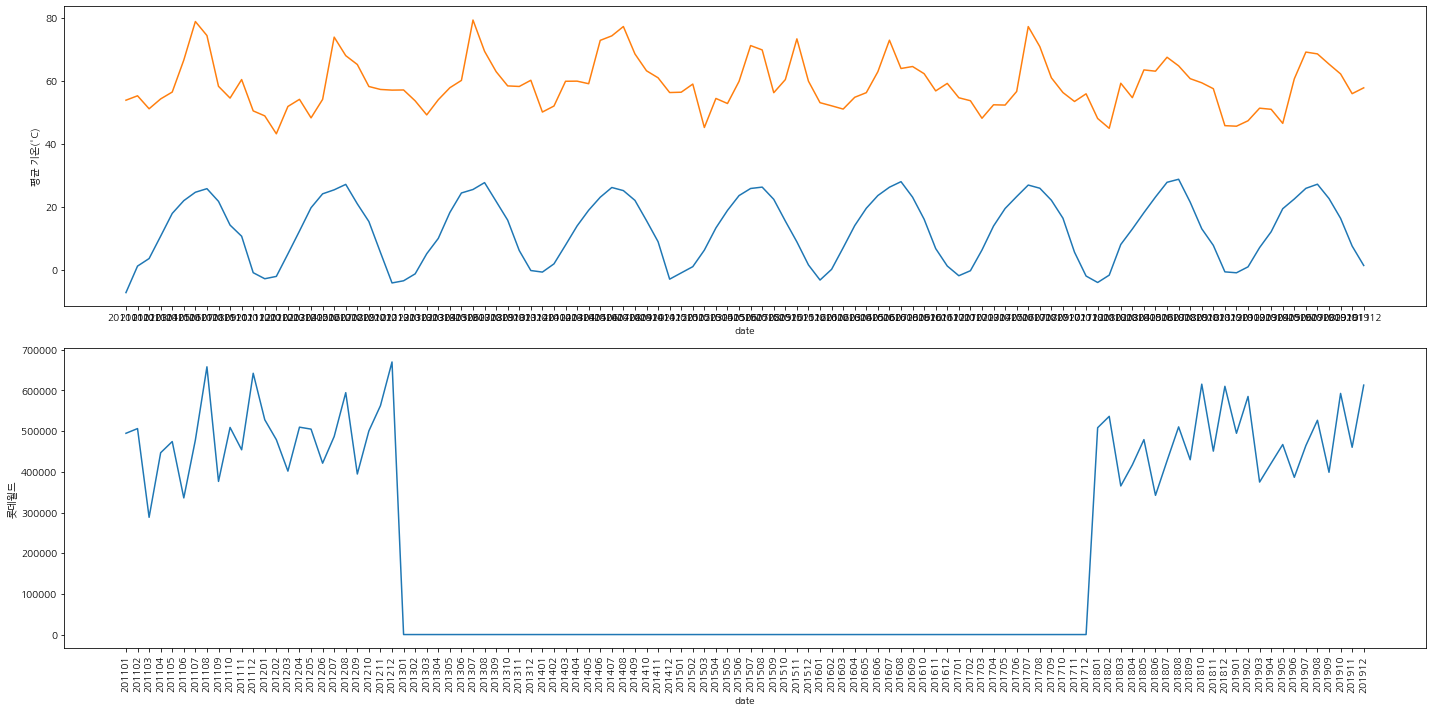

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '롯데월드', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['롯데월드']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   롯데월드   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     8.904
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           8.50e-08
Time:                        08:17:27   Log-Likelihood:                -1471.4
No. Observations:                 108   AIC:                             2957.
Df Residuals:                     101   BIC:                             2976.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.687e+06   4.44e+05      6.057      0.000    1.81e+06    3.57e+06
평균 기온(°C)      1.916e+05   4.16e+04      4.602      0.000    1.09e+05    2.74e+05
최고 기온(°C)       -1.9e+05   4.07e+04     -4.672      0.000   -2.71e+05   -1.09e+05
일강수량(mm)       1.442e+04   3831.138      3.765      0.000    6823.899     2.2e+04
평균 풍속(m/s)    -1.653e+05   4.47e+04     -3.698      0.000   -2.54e+05   -7.66e+04
평균 상대습도(%)    -2.472e+04   5640.146     -4.383      0.000   -3.59e+04   -1.35e+04
합계 일사량(MJ/m2)  1.341e+04   9504.495      1.411      0.161   -5444.678    3.23e+04
==============================================================================
Omnibus:                        2.397   Durbin-Watson:                   0.675
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                2.425
Skew:                           0.336   Prob(JB):                        0.297
Kurtosis:                       2.703   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##서울스카이

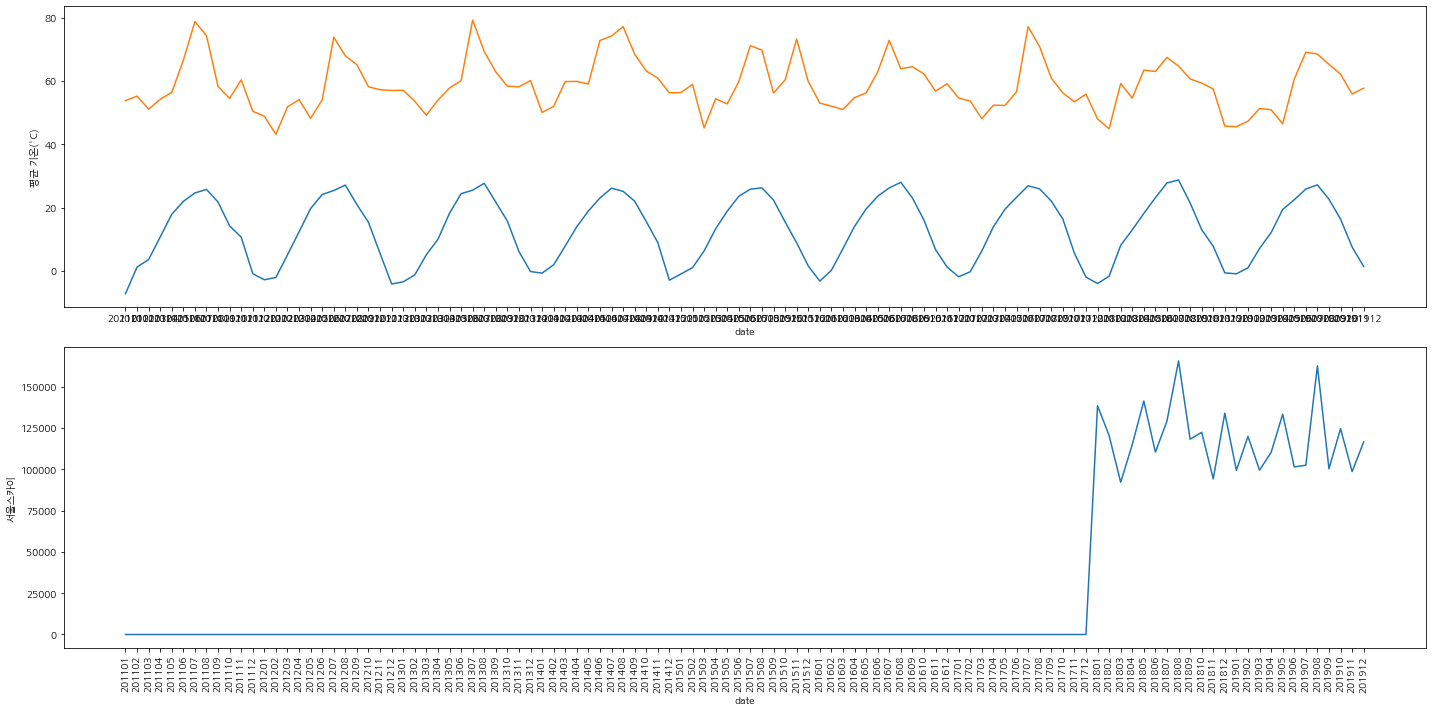

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '서울스카이', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['서울스카이']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  서울스카이   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     22.15
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           1.72e-16
Time:                        08:17:30   Log-Likelihood:                -1277.0
No. Observations:                 108   AIC:                             2568.
Df Residuals:                     101   BIC:                             2587.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.833e+05   7.33e+04      3.863      0.000    1.38e+05    4.29e+05
평균 기온(°C)      1.377e+04   6882.802      2.000      0.048     113.416    2.74e+04
최고 기온(°C)     -1.583e+04   6723.933     -2.354      0.021   -2.92e+04   -2488.727
일강수량(mm)       1276.5418    633.282      2.016      0.046      20.281    2532.803
평균 풍속(m/s)    -8.063e+04   7390.604    -10.910      0.000   -9.53e+04    -6.6e+04
평균 상대습도(%)     -878.4057    932.309     -0.942      0.348   -2727.855     971.044
합계 일사량(MJ/m2)  6576.0395   1571.081      4.186      0.000    3459.438    9692.641
==============================================================================
Omnibus:                        4.691   Durbin-Watson:                   0.923
Prob(Omnibus):                  0.096   Jarque-Bera (JB):                4.685
Skew:                           0.505   Prob(JB):                       0.0961
Kurtosis:                       2.851   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 아쿠아리움

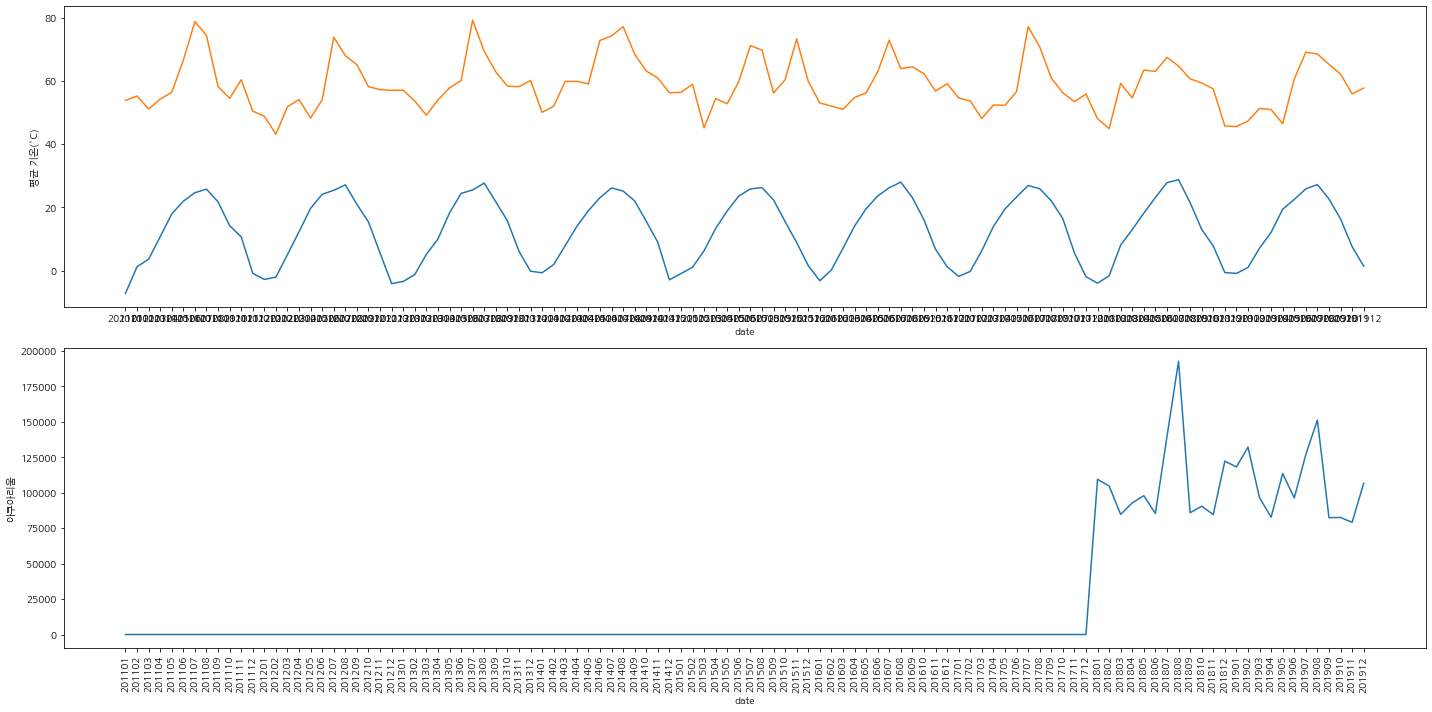

In [ ]:
fig, (ax1, ax2) = plt.subplots(figsize = (20, 10), nrows = 2, ncols = 1)
sns.lineplot(data = data, x = 'date', y = '평균 기온(°C)', ax = ax1)
sns.lineplot(data = data, x = 'date', y = '아쿠아리움', ax = ax2)
sns.lineplot(data = data, x = 'date', y = '평균 상대습도(%)', ax = ax1)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.rc('font', family='NanumGothic') 

In [ ]:
X = data[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']]
y = data['아쿠아리움']

X_constant = sm.add_constant(X)

model_1 = sm.OLS(y,X_constant)
lin_reg = model_1.fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  아쿠아리움   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     20.79
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           9.76e-16
Time:                        08:17:33   Log-Likelihood:                -1269.5
No. Observations:                 108   AIC:                             2553.
Df Residuals:                     101   BIC:                             2572.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.876e+05   6.84e+04      4.204      0.000    1.52e+05    4.23e+05
평균 기온(°C)      1.576e+04   6420.982      2.455      0.016    3023.372    2.85e+04
최고 기온(°C)     -1.731e+04   6272.772     -2.759      0.007   -2.98e+04   -4866.194
일강수량(mm)       1031.8829    590.790      1.747      0.084    -140.086    2203.852
평균 풍속(m/s)    -7.282e+04   6894.712    -10.561      0.000   -8.65e+04   -5.91e+04
평균 상대습도(%)    -1100.2464    869.753     -1.265      0.209   -2825.602     625.110
합계 일사량(MJ/m2)  5745.9403   1465.665      3.920      0.000    2838.456    8653.425
==============================================================================
Omnibus:                       11.010   Durbin-Watson:                   0.984
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.226
Skew:                           0.721   Prob(JB):                      0.00365
Kurtosis:                       3.643   Cond. No.                     1.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
data.columns

Index(['date', '평균 기온(°C)', '최저 기온(°C)', '최저 기온 시각(hhmi)', '최고 기온(°C)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)', '일강수량(mm)', '최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)', '평균 풍속(m/s)', '풍정합(100m)', '최다 풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도 시각(hhmi)', '평균 상대습도(%)',
       '평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)',
       '합계 일사량(MJ/m2)', '평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)', '경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서울약령시 한의약박물관', '세종대왕기념관',
       

In [ ]:
drop_data = ['최저 기온(°C)', '최저 기온 시각(hhmi)',
       '최고 기온 시각(hhmi)', '1시간 최다강수량 시각(hhmi)','최대 순간풍속(m/s)',
       '최대 순간풍속 풍향(16방위)', '최대 순간풍속 시각(hhmi)', '최대 풍속(m/s)', '최대 풍속 풍향(16방위)',
       '최대 풍속 시각(hhmi)','풍정합(100m)', '최다 풍향(16방위)',
       '평균 이슬점온도(°C)', '최소 상대습도(%)', '평균 상대습도 시각(hhmi)','평균 중기압(hPa)', '평균 현지기압(hPa)', '최고 해면 기압(hPa)', '최고 해면기압 시각(hhmi)',
       '최저 해면기압(hPa)', '최저 해면기압 시각(hhmi)', '평균 해면기압(hPa)', '가조시간(hr)',
       '합계 일조 시간(hr)', '1시간 최다 일사 시각(hhmi)', '1시간 최다 일사량(MJ/m2)','평균 전운량(10분위)', '평균 중하층운량(10분위)', '평균 지면온도(°C)',
       '최저 초상온도(°C)', '평균 5cm 지중온도(°C)', '평균 10cm 지중온도(°C)',
       '평균 20cm 지중온도(°C)', '평균 30cm 지중온도(°C)', '0.5m 지중온도(°C)',
       '1.0cm 지중온도(°C)', '1.5cm 지중온도(°C)', '3.0cm 지중온도(°C)', '5.0cm 지중온도(°C)',
       '합계 소형증발량(mm)', '9-9강수(mm)']

data = data.drop(drop_data, axis = 1)
data

,date,평균 기온(°C),최고 기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일사량(MJ/m2),경복궁,종묘,창경궁,창덕궁,남산골한옥마을,덕수궁,서울시립미술관 본관,국립중앙박물관,서울약령시 한의약박물관,세종대왕기념관,태릉 · 강릉 · 조선왕릉전시관,서대문자연사박물관,서대문형무소역사관,트릭아이미술관,헌릉ㆍ인릉,선릉·정릉,롯데월드,서울스카이,아쿠아리움
0,201101,-7.183871,-3.406452,1.112500,2.796774,53.829032,9.951290,141183,11486,17644,43677,72313,92135,234587,260272,3204,0,1747,34551,18407,10128,736,13486,494730,0,0
1,201102,1.221429,5.864286,9.700000,2.553571,55.228571,10.827857,230814,17078,35708,73330,135771,132920,171376,224691,2182,0,1943,20934,14387,15695,1730,18578,506321,0,0
2,201103,3.616129,8.345161,2.085714,3.406452,51.112903,16.342258,228276,22238,29856,78705,105735,64869,260687,184565,3303,0,3000,18641,47554,11468,2085,22696,288170,0,0
3,201104,10.720000,15.596667,10.009091,3.243333,54.240000,16.832333,349368,30470,70101,129150,176991,85548,56024,240861,3042,0,8029,24078,66009,11577,5212,43184,446939,0,0
4,201105,17.925806,22.983871,4.107692,2.832258,56.416129,17.091935,438567,56106,78017,151833,188983,103100,279310,307969,2644,0,17108,25593,72267,9507,6201,44836,474422,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,201908,27.190323,31.635484,12.700000,1.590323,68.516129,16.766897,260658,29250,55413,70899,73788,149905,273904,478483,4412,403,7079,37779,106315,7269,3928,29629,526720,162727,151226
104,201909,22.643333,27.100000,10.753846,2.183333,65.270000,12.892667,494024,12956,88586,159379,142530,181790,130096,244301,3587,883,8488,15771,97723,2437,4356,32549,398863,100336,82402
105,201910,16.370968,21.767742,7.928571,2.129032,62.164516,12.755806,464290,30737,92701,195038,163316,280107,123357,289342,12106,1191,26628,21167,127285,4148,8726,56195,592733,124684,82513
106,201911,7.580000,12.933333,9.850000,2.166667,55.900000,9.476000,327614,44043,85831,162858,125777,222529,57786,197011,5877,293,8802,19904,62358,2920,5719,30117,460324,98659,79118


## 관광지 분포 확인하기

In [ ]:
data.columns

Index(['date', '평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서울약령시 한의약박물관', '세종대왕기념관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉', '롯데월드', '서울스카이', '아쿠아리움'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

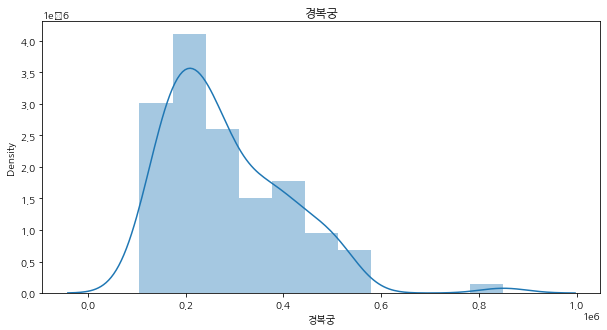

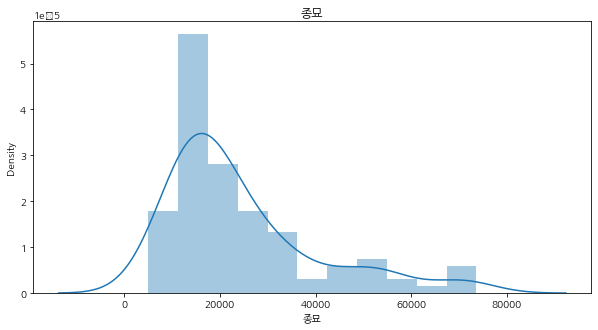

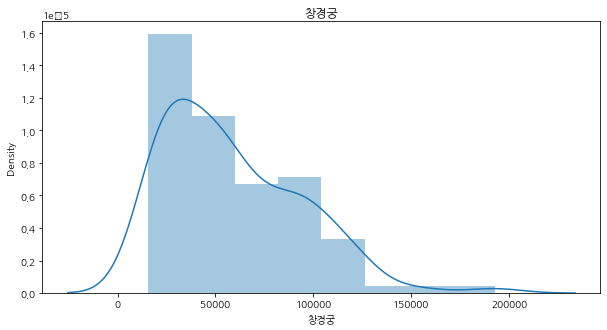

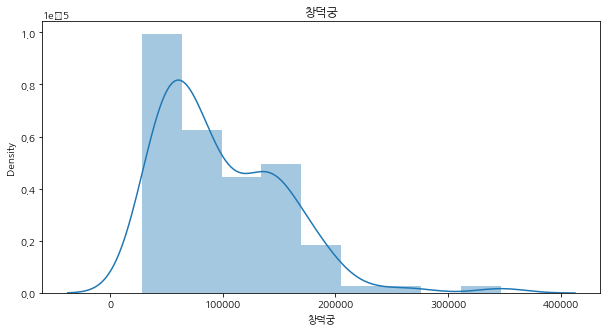

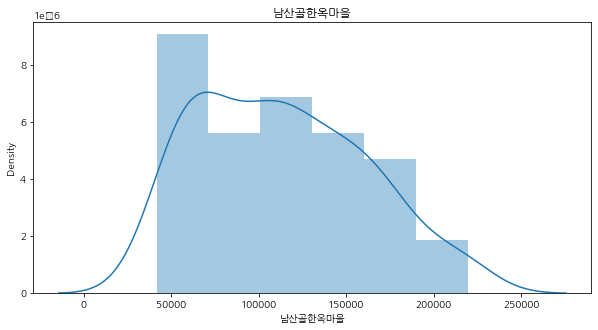

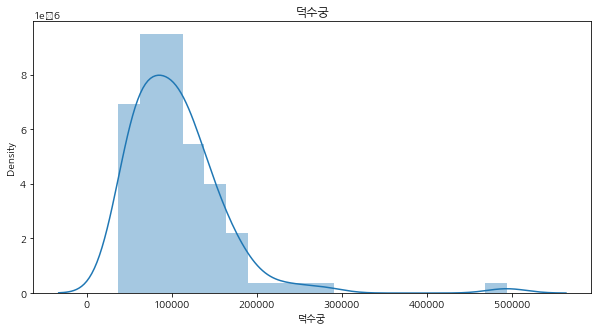

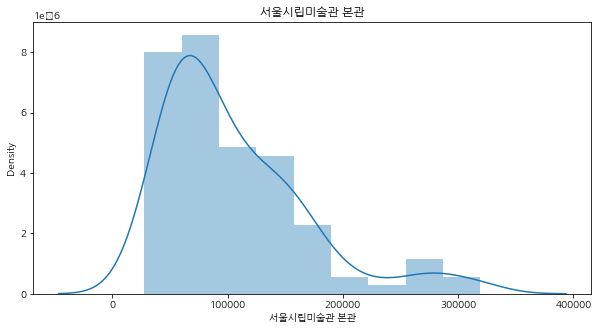

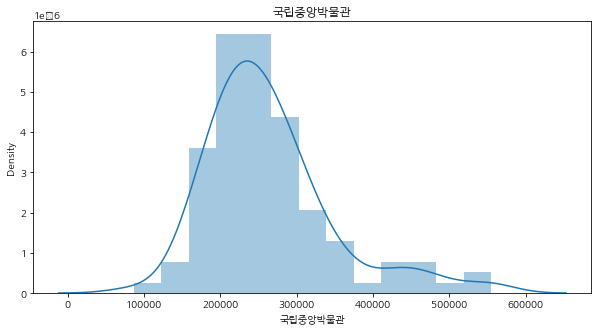

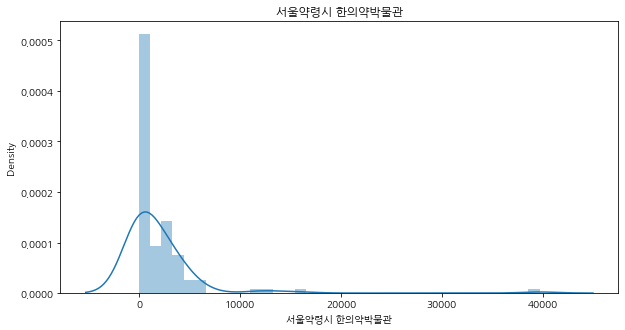

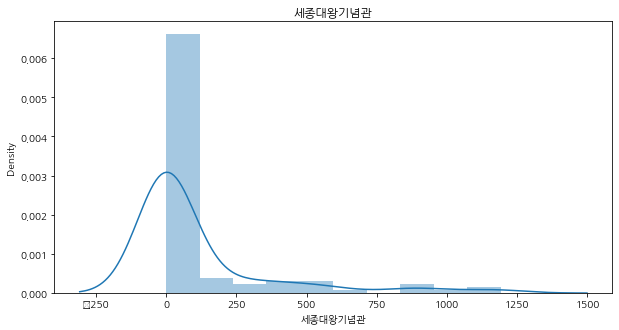

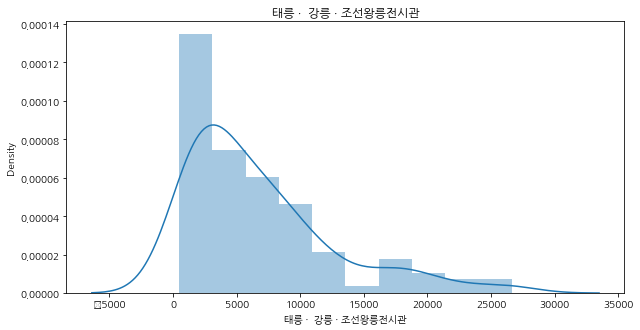

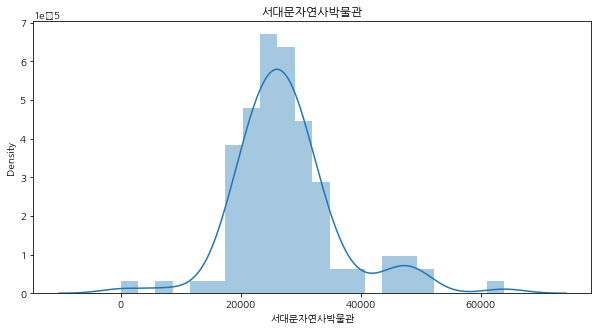

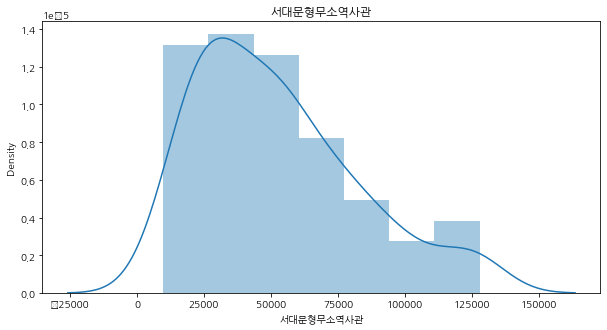

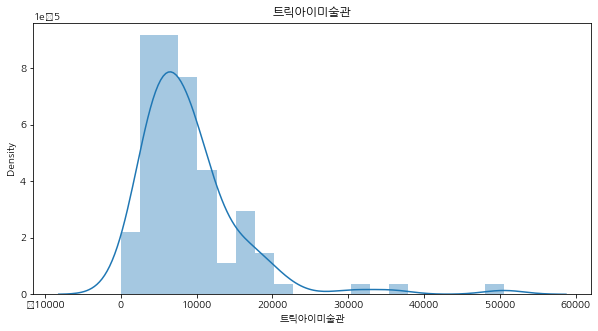

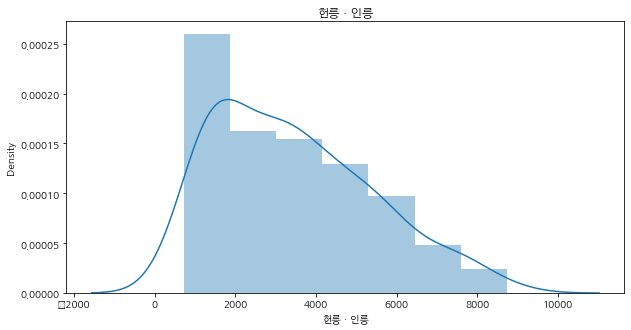

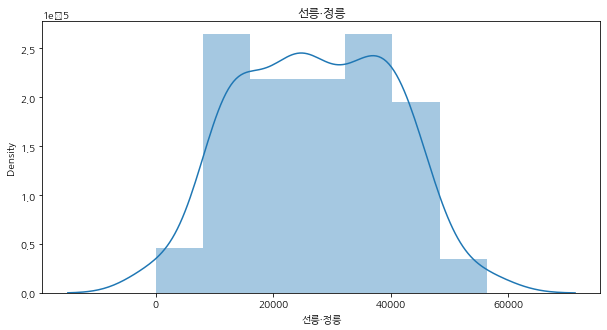

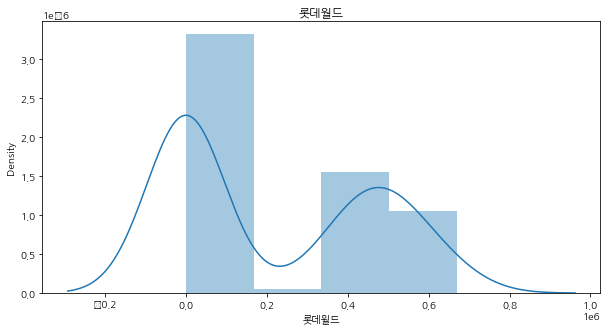

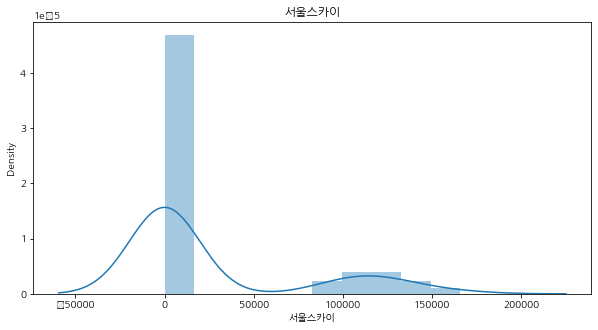

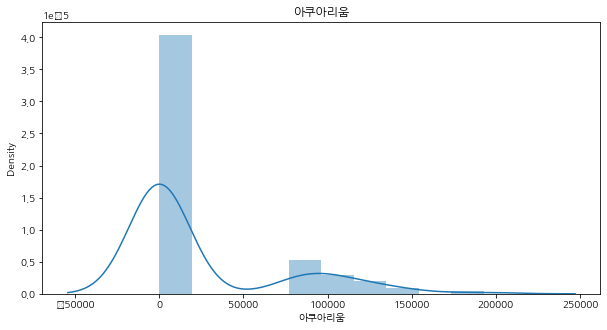

In [ ]:
tour_list = ['경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서울약령시 한의약박물관', '세종대왕기념관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉', '롯데월드', '서울스카이', '아쿠아리움']

for i in tour_list :
  fig, ax = plt.subplots(figsize = (10,5))
  sns.distplot(data[i])
  plt.title(i)

## 관광지별 데이터 프레임 만들기

관광지별로 데이터프레임을 따로만들어서 0인값을 제거해보자

추천지수 : 각 관광지 값을 75%값으로 나눠줌(향후 회의를 통해 수정)




In [ ]:
data.columns

Index(['date', '평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)', '경복궁', '종묘', '창경궁', '창덕궁', '남산골한옥마을',
       '덕수궁', '서울시립미술관 본관', '국립중앙박물관', '서울약령시 한의약박물관', '세종대왕기념관',
       '태릉 ·  강릉 · 조선왕릉전시관', '서대문자연사박물관', '서대문형무소역사관', '트릭아이미술관', '헌릉ㆍ인릉',
       '선릉·정릉', '롯데월드', '서울스카이', '아쿠아리움'],
      dtype='object')

In [ ]:
def tour(tour) :
  df = pd.merge(data[['date','평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']],seoul[['date', tour]], how = 'left', on = 'date')
  df = df.drop('date', axis = 1)
  df = df.dropna(axis = 0)
  df['추천지수'] = df[tour].apply(lambda x : x/df[tour].quantile(0.75))
  return df

경복궁 = tour('경복궁')
종묘 = tour('종묘')
창경궁 = tour('창경궁')
창덕궁 = tour('창덕궁')
남산골한옥마을 = tour('남산골한옥마을')
덕수궁 = tour('덕수궁')
서울시립미술관 = tour('서울시립미술관 본관')
국립중앙박물관 = tour('국립중앙박물관')
한의약박물관 = tour('서울약령시 한의약박물관')
세종대왕기념관 = tour('세종대왕기념관')
태릉 = tour('태릉 ·  강릉 · 조선왕릉전시관')
서대문자연사박물관 = tour('서대문자연사박물관')
서대문형무소역사관 = tour('서대문형무소역사관')
트릭아이미술관 = tour('트릭아이미술관')
헌릉 = tour('헌릉ㆍ인릉')
선릉 = tour('선릉·정릉')
롯데월드 = tour('롯데월드')
서울스카이 = tour('서울스카이')
아쿠아리움 = tour('아쿠아리움')

# 모델링

In [ ]:
!pip install catboost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
models = {
    'Xgboost' : XGBRegressor(),
    'lightgbm' : LGBMRegressor(),
    'LinearRegression' : LinearRegression()
}
data_list = [경복궁, 종묘, 창경궁, 창덕궁, 남산골한옥마을, 덕수궁, 서울시립미술관, 국립중앙박물관, 한의약박물관, 
             세종대왕기념관, 태릉, 서대문자연사박물관, 서대문형무소역사관, 
             트릭아이미술관, 헌릉, 선릉, 롯데월드, 서울스카이, 아쿠아리움]

In [ ]:
경복궁.columns

Index(['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)', '평균 상대습도(%)',
       '합계 일사량(MJ/m2)', '경복궁', '추천지수'],
      dtype='object')

In [ ]:

for i in data_list :
  print(i.columns[7])
  for key, regressor in models.items() :
    X_train, X_test, y_train, y_test = train_test_split(i[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']], i['추천지수'], test_size = 0.2, random_state = 42)
    model = regressor
    model.fit(X_train, y_train)
    print(key)
    print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
    y_pred = model.predict(X_test)
    print('rmse : ', round(np.sqrt(mean_squared_error(y_test,y_pred)), 4))
    print('r2 : ', round(r2_score(y_test,y_pred), 4))
    print(y_pred)
    print('-'*100)
  print('#'*100)

추천지수
[08:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Xgboost
ACC :  66.07 %
rmse :  0.2621
r2 :  0.6607
[0.820657   0.9137125  1.3058     0.45454744 0.5793993  0.6352694
 0.8683854  1.1967006  0.5570572  0.39942533 1.3849058  0.5052063
 0.41458362 0.88759875 0.83855236 1.281395   0.91941524 1.1692984
 0.70890343 0.6839415  0.43306744 0.4449495 ]
----------------------------------------------------------------------------------------------------
lightgbm
ACC :  61.4 %
rmse :  0.2796
r2 :  0.614
[0.83422735 0.98670847 1.22008511 0.51906587 0.57161538 0.81613081
 0.75243262 1.21945869 0.51932699 0.46294925 1.27599137 0.62490294
 0.48076814 0.98746974 0.71181234 1.3393235  0.83422735 1.20226622
 0.67140451 0.60503185 0.46294925 0.45522835]
----------------------------------------------------------------------------------------------------
LinearRegression
ACC :  42.64 %
rmse :  0.3409
r2 :  0.4264
[1.01367429 0.

1. 날씨데이터를 받으면  관광지별로 추천지수 예측

2. 예측한 추천지수를 바탕으로 상위 n개 추천

하는 알고리즘을 짜보자



In [ ]:
날씨 = pd.DataFrame([['평균 기온(°C)', 22], 
                   ['최고 기온(°C)', 25],
                   ['일강수량(mm)', 1.5],
                   ['평균 풍속(m/s)', 3],
                   ['평균 상대습도(%)', 51],
                   ['합계 일사량(MJ/m2)',11]]).T
날씨 = 날씨.rename(columns = {0 : '평균 기온(°C)', 1 : '최고 기온(°C)', 2 : '일강수량(mm)', 3: '평균 풍속(m/s)',
                          4: '평균 상대습도(%)', 5 : '합계 일사량(MJ/m2)'})
날씨 = 날씨.drop(0, axis =0).astype('float64')
날씨

,평균 기온(°C),최고 기온(°C),일강수량(mm),평균 풍속(m/s),평균 상대습도(%),합계 일사량(MJ/m2)
1,22.0,25.0,1.5,3.0,51.0,11.0


In [ ]:
def recommand(data) :
  test_df = 날씨
  train_df = data

  model = XGBRegressor()
  X_train, X_test, y_train, y_test = train_test_split(train_df[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', '평균 풍속(m/s)',
       '평균 상대습도(%)', '합계 일사량(MJ/m2)']], train_df['추천지수'], test_size = 0.2, random_state = 42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  test_pred = model.predict(test_df[['평균 기온(°C)', '최고 기온(°C)', '일강수량(mm)', 
                                    '평균 풍속(m/s)','평균 상대습도(%)', '합계 일사량(MJ/m2)']])
  return data.columns[6], list(test_pred)[0]

recommand_dic = {}
for i in data_list :
  col, value = recommand(i)
  recommand_dic[col] = value
recommand_dic

[09:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:48:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

{'경복궁': 1.2125354,
 '국립중앙박물관': 0.78511345,
 '남산골한옥마을': 1.35935,
 '덕수궁': 0.61735237,
 '롯데월드': 0.8696246,
 '서대문자연사박물관': 0.75905377,
 '서대문형무소역사관': 0.94077647,
 '서울스카이': 0.86758614,
 '서울시립미술관 본관': 0.51641595,
 '서울약령시 한의약박물관': 0.56512153,
 '선릉·정릉': 1.0276272,
 '세종대왕기념관': 1.191982,
 '아쿠아리움': 0.7592827,
 '종묘': 0.6016424,
 '창경궁': 0.87185395,
 '창덕궁': 0.8731183,
 '태릉 ·  강릉 · 조선왕릉전시관': 0.86822367,
 '트릭아이미술관': 0.75832975,
 '헌릉ㆍ인릉': 1.1632195}

In [ ]:
recommand_data = pd.DataFrame(recommand_dic, index = [0]).T
recommand_data
recommand_data = recommand_data.sort_values(0, ascending = False)
print('오늘 날씨의 추천 지역 \n1위 : ' ,recommand_data.index[0],  '\n2위 : ', recommand_data.index[1], '\n3위 : ', recommand_data.index[2])

오늘 날씨의 추천 지역 
1위 :  남산골한옥마을 
2위 :  경복궁 
3위 :  세종대왕기념관
